In [1]:
# # adjsut the basic logging lovel of notebook
# import logging
# logging.basicConfig(level=logging.WARNING)

import os
import yaml
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
from matplotlib.lines import Line2D
from palettable.colorbrewer import qualitative

from auditory_cortex.analyses import Correlations
from auditory_cortex import results_dir, aux_dir, saved_corr_dir
from auditory_cortex.utils import CorrelationUtils
from auditory_cortex.plotters.correlation_plotter import RegPlotter

from pycolormap_2d import ColorMap2DBremm, ColorMap2DZiegler
%matplotlib inline

In [7]:
saved_corr_dir

'/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations'

### combine correlations results..

In [2]:
normalizer_filename = 'modified_bins_normalizer.csv'

model_name = 'wave2letter_modified'
# model_name = 'deepspeech2'
# model_name = 'speech2text'
# model_name = 'wave2vec2'
# model_name = 'whisper_tiny'
# model_name = 'whisper_base'
# 
# id = '_glm_shuffled_0'
# id = '_glm_shuffled_1'

# id = '_glm_0_0'
# id = '_glm_0_1'
# id = '_reset_weights2_0'
# id = '_reset_weights2_1'
# id = '_reset_weights2'
id = '_bins_corrected_100'
# id = '_layers_redefined'
# id = '_layers_redefined_features'

# id = '_reset_redefined'
# id = '_reset_redefined_features'

# id = '_reset_weights1_features'
# id = '_glm_corrected_0'
# id = '_glm_corrected_1'
# id = '_glm_corrected_2'
# id = '_glm_corrected_3'

# id = '_bins_corrected_poiss'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )
print(f"'{model_name}'")
print(corr_obj.data['session'].unique().size)

Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
'wave2letter_modified'
45


In [4]:
corr_obj.data['bin_width'].unique()

array([100., 200., 500., 600., 700., 800., 300., 400.,  80.,  60.,  40.,
        20.,  10.])

In [13]:
# os.remove(corr_obj.get_filepath())

In [9]:
sessions_done = corr_obj.data['session'].unique()

sessions = np.array([180627., 180719., 180720., 180731., 180807., 180808., 180814.,
                190606., 191113., 191115., 191121., 191125., 191206., 191210.,
                200205., 200206., 200207., 200213., 200313.])
sessions_done[np.isin(sessions_done, sessions)].shape

(19,)

(15,)

In [28]:
corr_obj.data['session'].unique()

array([180413., 180420., 180501., 180502., 180613., 180622., 180627.,
       180717., 180719., 180720., 180724., 180728., 180730., 180731.,
       180807., 180808., 180810., 180814., 190606., 191113., 191115.,
       191121.])

In [25]:
model_name = 'deepspeech2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'reset_weights2',
    'reset_weights2_1',
    'reset_weights2_0'
        # 'glm_0_0', 'glm_0_1', 'glm_1_0', 'glm_1_1',
        # 'glm_2_0', 'glm_2_1', 'glm_3_0', 'glm_3_1',
        # 'glm_4_0', 'glm_4_1', 'glm_5_0', 'glm_5_1',
        # 'glm_6_0', 'glm_6_1', 
    # # 'glm_corrected_0',  not done yet...
    # 'glm_corrected_1', 'glm_corrected_2', 'glm_corrected_3',
    # 'glm_corrected_4', 'glm_corrected_5',
    # 'glm_corrected_6',
    ]
# output_identifier = 'glm'

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename,
                            #    output_identifier=output_identifier
        )

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_weights2_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_weights2_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_reset_weights2_corr_results.csv


In [26]:
model_name = 'speech2text'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'reset_weights2',
    'reset_weights2_1',
    'reset_weights2_0'
    # 'glm_corrected_0', 'glm_corrected_1', 'glm_corrected_2', 'glm_corrected_3',
    # 'glm_corrected_4', 'glm_corrected_5', 'glm_corrected_6',
    # 'glm_corrected_7', 'glm_corrected_8', 'glm_corrected_9', 'glm_corrected_10',
    # 'glm_corrected_11', 'glm_corrected_12', 'glm_corrected_13',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_reset_weights2_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_reset_weights2_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_reset_weights2_corr_results.csv


In [17]:
# model_name = 'whisper_base'
# model_name = 'whisper_tiny'
model_name = 'wave2letter_modified'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'reset_weights2'
    # 'glm_corrected_0', 'glm_corrected_1', 'glm_corrected_2', 'glm_corrected_3',
    # 'glm_corrected_4', 'glm_corrected_5', 'glm_corrected_6', 'glm_corrected_7',
    
    # 'glm_corrected_2', 'glm_corrected_2_1', 'glm_corrected_2_2',
    # 'glm_corrected_2_3', 'glm_corrected_2_4'

    # 'glm_corrected_0', 'glm_corrected_0_1', 'glm_corrected_0_2',
    # 'glm_corrected_1', 'glm_corrected_1_1', 'glm_corrected_1_2',
    # 'glm_corrected_3', 'glm_corrected_3_1', 'glm_corrected_3_2',
    # 'glm_corrected_4', 'glm_corrected_4_1', 'glm_corrected_4_2',
    # 'glm_corrected_5', 'glm_corrected_5_1', 'glm_corrected_5_2',
    # 'glm_corrected_6', 'glm_corrected_6_1', 'glm_corrected_6_2',
    # 'glm_corrected_7', 'glm_corrected_7_1', 'glm_corrected_7_2',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_reset_weights2_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_reset_weights2_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_reset_weights2_corr_results.csv


In [9]:
model_name = 'speech2text'
# model_name = 'deepspeech2'
# model_name = 'whisper_base'
# model_name = 'whisper_tiny'
# model_name = 'wave2letter_modified'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_100'
    ]

output_identifier = 'trained_all_bins'
Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename,
                               output_identifier=output_identifier
        )

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_trained_all_bins_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_trained_all_bins_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_trained_all_bins_corr_results.csv


In [9]:
model_name = 'wave2vec2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    # 'reset_redefined',
    # 'reset_redefined_features',

    # 'layers_redefined',
    # 'layers_redefined_features',
    # 'reset_weights1',
    # 'reset_weights1_features'

    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_reset_redefined_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_reset_redefined_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_reset_redefined_corr_results.csv


In [3]:
# os.remove(corr_obj.get_filepath())

In [55]:
model_name = 'wave2letter_modified'

ids = ['reset_weights', 'reset_weights0', 'reset_weights1', 'reset_weights2']

corr_objs = []
for id in ids:
    corr_objs.append(Correlations(model_name=model_name+'_'+id))

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [57]:
new_data = corr_objs[0].data

output_identifier = 'reset_weights_avg'
filename = f"{model_name}_{output_identifier}_corr_results.csv"
file_path = os.path.join(saved_corr_dir, filename)

new_data.to_csv(file_path, index=False)

In [60]:
new_corr_obj = Correlations(model_name=model_name+'_'+output_identifier)

Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [63]:
new_corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type,normalized_test_cc
0,180413.0,0.0,0.0,20.0,0.0,0.0,-0.018502,0.012303,500.0,80.0,conv,-0.166807
1,180413.0,0.0,1.0,20.0,0.0,0.0,-0.003441,-0.006701,500.0,60.0,conv,NaN
2,180413.0,0.0,2.0,20.0,0.0,0.0,-0.084300,0.006253,500.0,10.0,conv,-1.066062
3,180413.0,0.0,3.0,20.0,0.0,0.0,-0.016096,-0.004253,500.0,80.0,conv,NaN
4,180413.0,0.0,4.0,20.0,0.0,0.0,-0.043827,-0.019774,500.0,80.0,conv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20611,200318.0,11.0,40.0,20.0,0.0,0.0,0.075036,0.010472,500.0,90.0,conv,0.733253
20612,200318.0,11.0,41.0,20.0,0.0,0.0,0.054427,-0.006748,500.0,100.0,conv,NaN
20613,200318.0,11.0,42.0,20.0,0.0,0.0,0.064376,-0.002358,500.0,100.0,conv,NaN
20614,200318.0,11.0,43.0,20.0,0.0,0.0,0.086107,-0.007007,500.0,90.0,conv,NaN


In [74]:


bin_widths = new_corr_obj.data['bin_width'].unique()
delays = new_corr_obj.data['delay'].unique()
sessions = new_corr_obj.get_all_sessions()

for bin_width in bin_widths:
    for delay in delays:
        for sess in sessions:
            layers = new_corr_obj.get_all_layers(sess)
            channels = new_corr_obj.get_all_channels(sess)
            for layer in layers:
                for ch in channels:
                    corr_avg = 0
                    norm_corr_avg = 0
                    for corr_obj in corr_objs:
                        df = corr_obj.get_selected_data(
                            sessions=[sess], 
                            bin_width=bin_width,
                            delay=delay,
                            layer=layer,
                            channel=ch,
                        )
                        corr_avg += corr_obj.data.loc[df.index.values[0], ['test_cc_raw']]
                        norm_corr_avg += corr_obj.data.loc[df.index.values[0], ['normalized_test_cc']]
                    norm_corr_avg /= len(corr_objs)
                    corr_avg /= len(corr_objs)

                    # writing the avg value
                    df = new_corr_obj.get_selected_data(
                            sessions=[sess], 
                            bin_width=bin_width,
                            delay=delay,
                            layer=layer,
                            channel=ch,
                        )
                    
                    new_corr_obj.data.at[df.index.values[0], 'test_cc_raw'] = corr_avg
                    new_corr_obj.data.at[df.index.values[0], 'normalized_test_cc'] = norm_corr_avg


ValueError: Incompatible indexer with Series

In [ ]:
new_corr_obj.data.at[df.index, 'test_cc_raw'] = corr_avg

In [38]:
corr_obj.data.columns

Index(['session', 'layer', 'channel', 'bin_width', 'delay', 'train_cc_raw',
       'test_cc_raw', 'poiss_entropy', 'uncertainty_per_spike',
       'bits_per_spike_NLB', 'normalizer', 'N_sents', 'opt_delays',
       'layer_type', 'normalized_test_cc'],
      dtype='object')

In [61]:
df = corr_obj.get_selected_data(
    sessions=[sess], 
    bin_width=bin_width,
    delay=delay,
    layer=layer,
    channel=ch,
)
# corr_obj.data.loc[df.index, ['normalized_test_cc']]

In [69]:
df.index.values

array([0])

In [71]:
new_corr_obj.data.at[df.index.values[0], 'test_cc_raw'] = 0

In [72]:
new_corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays,layer_type,normalized_test_cc
0,180413.0,0.0,0.0,20.0,0.0,0.0,0.000000,0.012303,500.0,80.0,conv,-0.166807
1,180413.0,0.0,1.0,20.0,0.0,0.0,-0.003441,-0.006701,500.0,60.0,conv,NaN
2,180413.0,0.0,2.0,20.0,0.0,0.0,-0.084300,0.006253,500.0,10.0,conv,-1.066062
3,180413.0,0.0,3.0,20.0,0.0,0.0,-0.016096,-0.004253,500.0,80.0,conv,NaN
4,180413.0,0.0,4.0,20.0,0.0,0.0,-0.043827,-0.019774,500.0,80.0,conv,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20611,200318.0,11.0,40.0,20.0,0.0,0.0,0.075036,0.010472,500.0,90.0,conv,0.733253
20612,200318.0,11.0,41.0,20.0,0.0,0.0,0.054427,-0.006748,500.0,100.0,conv,NaN
20613,200318.0,11.0,42.0,20.0,0.0,0.0,0.064376,-0.002358,500.0,100.0,conv,NaN
20614,200318.0,11.0,43.0,20.0,0.0,0.0,0.086107,-0.007007,500.0,90.0,conv,NaN


In [ ]:
corr_obj.data.at[df.index, '']

,normalized_test_cc
0,1.785214


### significant sessions

In [3]:
normalizer_filename = 'modified_bins_normalizer.csv'
model_name = 'wave2vec2'
id = '_bins_corrected_100'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )

bin_width = 20
threshold = corr_obj.get_normalizer_threshold(bin_width=bin_width)
corr_obj.get_significant_sessions(threshold)

Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Reading exisiting normalizer thresholds...


array([180627., 180719., 180720., 180731., 180807., 180808., 180814.,
       190606., 191113., 191115., 191121., 191125., 191206., 191210.,
       200205., 200206., 200207., 200213., 200313.])

In [4]:
subjects = np.array([180627., 180719., 180720., 180731., 180807., 180808., 180814.,
                    190606., 191113., 191115., 191121., 191125., 191206., 191210.,
                    200205., 200206., 200207., 200213., 200313.]).astype(int).astype(str)

In [5]:
subjects

array(['180627', '180719', '180720', '180731', '180807', '180808',
       '180814', '190606', '191113', '191115', '191121', '191125',
       '191206', '191210', '200205', '200206', '200207', '200213',
       '200313'], dtype='<U21')

### Number of sig. channels as function of bin_width

In [2]:
normalizer_filename = 'modified_bins_normalizer.csv'
model_name = 'wave2vec2'
id = '_bins_corrected_100'

corr_obj = Correlations(
    model_name=model_name+id,
    normalizer_filename=normalizer_filename
    )

Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [3]:
sig_sessions = corr_obj.get_significant_sessions()

In [4]:
sig_sessions.size

45

In [5]:
from auditory_cortex.neural_data import NeuralMetaData
metadata = NeuralMetaData()
sessions_available = metadata.get_all_available_sessions()
sessions_available = sessions_available.astype(np.float32)
sessions_available.size

41

In [10]:
sessions_available

array([180413., 180420., 180501., 180502., 180613., 180622., 180627.,
       180717., 180719., 180720., 180724., 180725., 180728., 180730.,
       180731., 180807., 180808., 180810., 180814., 190604., 190605.,
       190606., 190607., 190703., 190726., 190801., 191113., 191115.,
       191121., 191125., 191206., 191209., 191210., 191211., 191212.,
       191219., 200205., 200206., 200207., 200212., 200213., 200219.,
       200226., 200313., 200318.], dtype=float32)

In [6]:
sig_sessions[np.isin(sig_sessions, sessions_available, invert=True)]

array([180725., 190607., 191212., 200226.])

In [12]:
sig_sessions.size

45

In [13]:
sessions_available.size

45

In [4]:
from auditory_cortex import bad_sessions

sig_sessions[np.isin(sig_sessions, bad_sessions)]

array([], dtype=float64)

In [13]:
# area = 'core'
area = 'belt'
bin_width = 20
# threshold = 0.061
poisson_dist = True

bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    threshold = corr_obj.get_normalizer_threshold(bin_width=bin_width, poisson_normalizer=poisson_dist)
    print(f"At bin_width: {bin_width}, threshold={threshold:.2f}")
    area_sessions = corr_obj.metadata.get_all_sessions(area)

    total_channels = 0
    select_data = corr_obj.get_selected_data(
            sessions=area_sessions,
            bin_width=bin_width, 
            layer=7,
            delay=0,
            threshold=threshold,
            N_sents=499
        )

    print(select_data.shape)



Reading exisiting normalizer thresholds...
At bin_width: 100.0, threshold=0.13
(29, 12)
Reading exisiting normalizer thresholds...
At bin_width: 200.0, threshold=0.19
(24, 12)
Reading exisiting normalizer thresholds...
At bin_width: 300.0, threshold=0.22
(17, 12)
Reading exisiting normalizer thresholds...
At bin_width: 400.0, threshold=0.26
(13, 12)
Reading exisiting normalizer thresholds...
At bin_width: 500.0, threshold=0.29
(13, 12)
Reading exisiting normalizer thresholds...
At bin_width: 600.0, threshold=0.31
(9, 12)
Reading exisiting normalizer thresholds...
At bin_width: 700.0, threshold=0.34
(12, 12)
Reading exisiting normalizer thresholds...
At bin_width: 800.0, threshold=0.37
(5, 12)


In [12]:
total_channels

198

### Delete right away...

### All networks Best layerss..

In [2]:
from auditory_cortex.plotters.correlation_plotter import RegPlotter

Reading existing dataframe.


Reading existing dataframe.


/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/auditory_cortex/analyses/regression_correlations.py:43: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.corr_file_path)


Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.


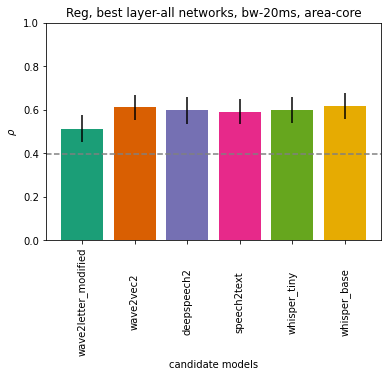

In [3]:
RegPlotter.bar_plot_best_layer_all_networks(area='core',
                    identifier='_sampling_rate_opt_neural_delay')

Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
model_name 'baseline' not recognizable!!!


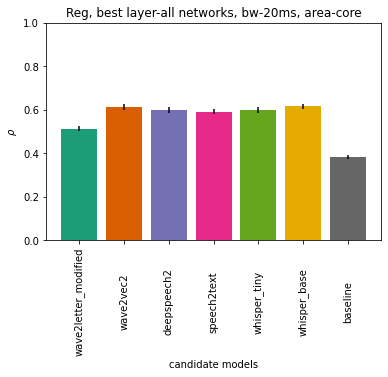

In [3]:
RegPlotter.bar_plot_best_layer_all_networks(area='core',
                    identifier='_sampling_rate_opt_neural_delay', threshold=0.061)

Reading existing dataframe.
Reading existing dataframe.


/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/auditory_cortex/analyses/regression_correlations.py:43: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.corr_file_path)


Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.


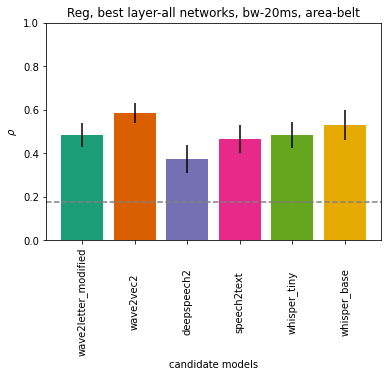

In [4]:
RegPlotter.bar_plot_best_layer_all_networks(area='belt', 
                threshold=0.061,
                identifier='_sampling_rate_opt_neural_delay',
                )

Reading existing dataframe.


Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
model_name 'baseline' not recognizable!!!


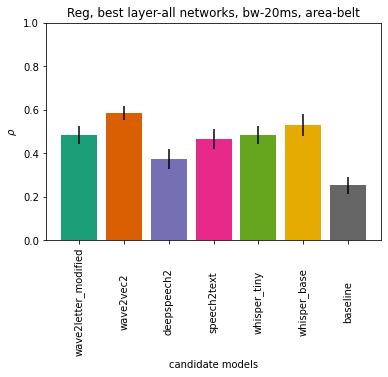

In [4]:
RegPlotter.bar_plot_best_layer_all_networks(area='belt', 
                threshold=0.061,
                identifier='_sampling_rate_opt_neural_delay',
                )

In [5]:
from auditory_cortex import model_names
identifier = '_sampling_rate_opt_neural_delay'
area = 'core'
bin_width = 20
delay = 0
threshold = 0.061




dist_peak_layer_each_model = {}
for model_name in model_names: 

    corr_obj = Correlations(model_name+identifier)
    # print(f"Object created for {model_name}, with id {identifier}")
    corr_dict = corr_obj.get_corr_all_layers_for_bin_width(
        neural_area=area, bin_width=bin_width,
        delay=0, threshold=threshold,
        normalized=True
    )
    layer_medians = {np.median(v):k for k,v in corr_dict.items()}
    peak_median = max(layer_medians)
    peak_layer = layer_medians[peak_median]
    dist_peak_layer_each_model[model_name] = corr_dict[peak_layer]

# baseline is same for all networks..
corr_baseline = corr_obj.get_baseline_corr_for_area(neural_area=area,
                                                    threshold=threshold)
dist_peak_layer_each_model['baseline'] = corr_baseline


Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.
Reading existing dataframe.


In [13]:
dist_peak_layer_each_model.keys()

dict_keys(['wave2letter_modified', 'wave2vec2', 'deepspeech2', 'speech2text', 'whisper_tiny', 'whisper_base', 'baseline'])

In [14]:
import scipy
p_values = {}
statistic = {}
for model_name in model_names:
    out = scipy.stats.wilcoxon(
        x = dist_peak_layer_each_model[model_name], 
        y=dist_peak_layer_each_model['baseline']
    )
    p_values[model_name] = out.pvalue
    statistic[model_name] = out.statistic
    

In [15]:
p_values

{'wave2letter_modified': 1.3553000387223862e-24,
 'wave2vec2': 4.1514802682912986e-33,
 'deepspeech2': 2.297610508764165e-30,
 'speech2text': 2.9304905109677885e-31,
 'whisper_tiny': 1.1433323622736435e-32,
 'whisper_base': 5.513707548206758e-33}

In [9]:
dist_peak_layer_each_model[model_names[0]].shape

(198,)

In [10]:
dist_peak_layer_each_model['baseline'].shape

(183,)

In [ ]:
dist_peak_layer_each_model[model_names[0]]

### All network layers at bin_width=20

Reading existing dataframe.


/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/auditory_cortex/analyses/regression_correlations.py:43: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.corr_file_path)


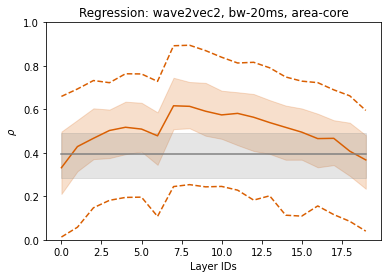

In [10]:
model_name = 'wave2vec2'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


/home/ahmedb/projects/Wav2Letter/Auditory_Cortex/auditory_cortex/analyses/regression_correlations.py:43: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.corr_file_path)


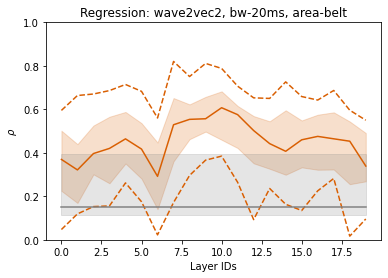

In [11]:
model_name = 'wave2vec2'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


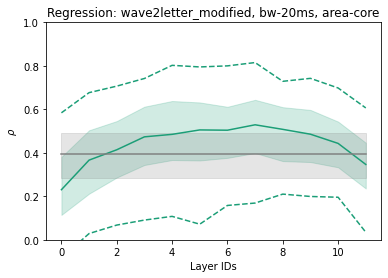

In [12]:
model_name = 'wave2letter_modified'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


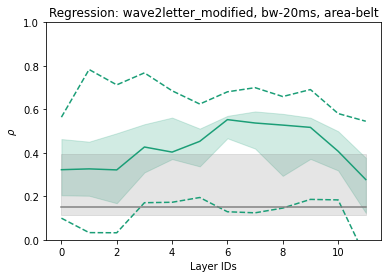

In [13]:
model_name = 'wave2letter_modified'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


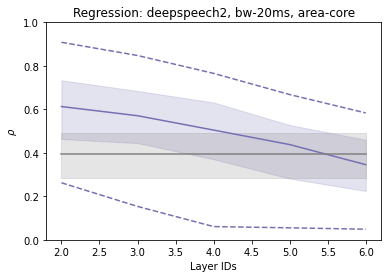

In [14]:
model_name = 'deepspeech2'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


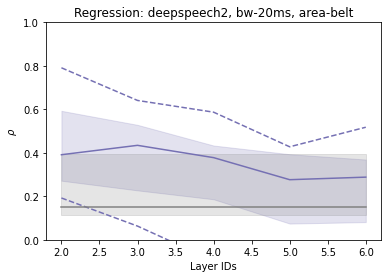

In [15]:
model_name = 'deepspeech2'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


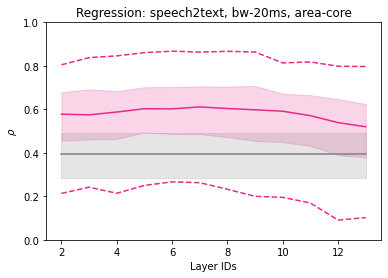

In [16]:
model_name = 'speech2text'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


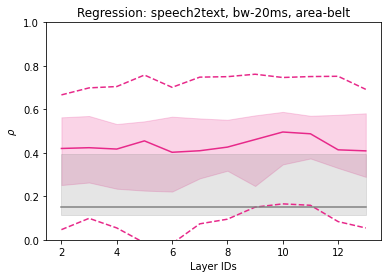

In [17]:
model_name = 'speech2text'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


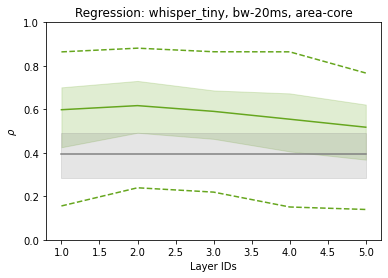

In [18]:
model_name = 'whisper_tiny'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


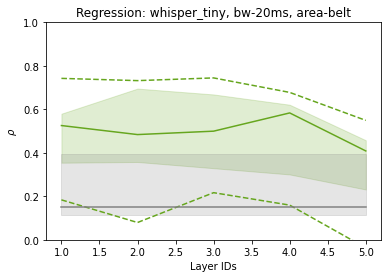

In [19]:
model_name = 'whisper_tiny'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


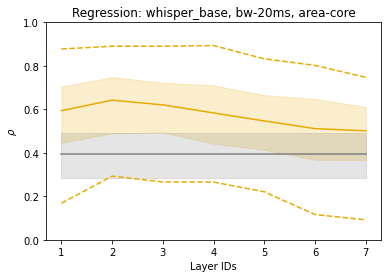

In [20]:
model_name = 'whisper_base'
area = 'core'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

Reading existing dataframe.


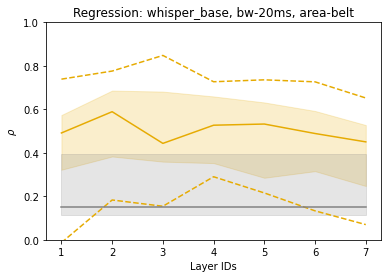

In [21]:
model_name = 'whisper_base'
area = 'belt'
bin_width = 20
threshold = 0.061
RegPlotter.plot_all_network_layers_at_bin_width(
    model_name=model_name, area = area, bin_width=bin_width,
    threshold=threshold, identifier='_sampling_rate_opt_neural_delay'
)

### Network layer at all bin_widths

In [26]:
model_name = 'wave2letter_modified'
identifier = '_opt_neural_delay'
corr_obj = Correlations(model_name+identifier)

Reading existing dataframe.


#### with different normalizer and DIFFERENT threshold as well...

##### deepspeech2

Reading existing dataframe.
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 800.0, num_samples: 24...
Computing null distribution for bin_width: 400.0, num_samples: 45...


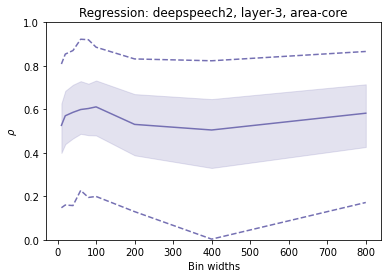

In [3]:
model_name = 'deepspeech2'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

Reading existing dataframe.
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 800.0, num_samples: 24...
Computing null distribution for bin_width: 400.0, num_samples: 45...


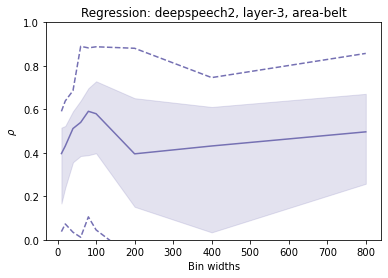

In [4]:
model_name = 'deepspeech2'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### speech2text

Reading existing dataframe.
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 800.0, num_samples: 24...
Computing null distribution for bin_width: 400.0, num_samples: 45...


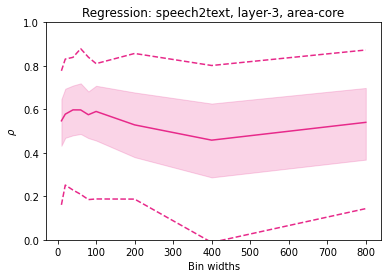

In [5]:
model_name = 'speech2text'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

Reading existing dataframe.
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 800.0, num_samples: 24...
Computing null distribution for bin_width: 400.0, num_samples: 45...


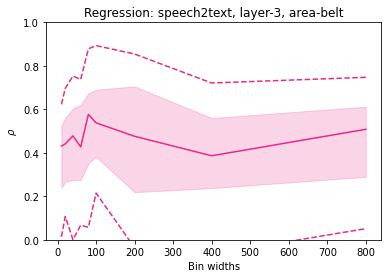

In [6]:
model_name = 'speech2text'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### wave2vec2

In [18]:
model_name = 'wave2vec2'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

Reading existing dataframe.
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_sampling_rate_opt_neural_delay_corr_results.csv


Reading existing dataframe.
Computing null distribution for bin_width: 5.0, num_samples: 3314...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...


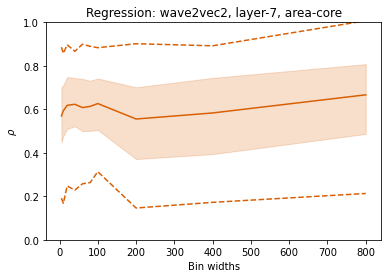

In [2]:
model_name = 'wave2vec2'
layer = 7
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

Reading existing dataframe.
Computing null distribution for bin_width: 5.0, num_samples: 3314...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...


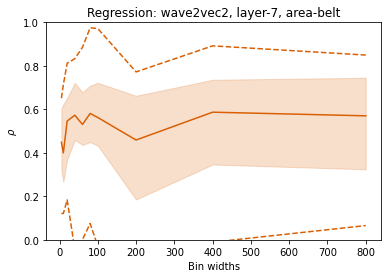

In [3]:
model_name = 'wave2vec2'
layer = 7
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### wave2letter_modified

Reading existing dataframe.
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 5.0, num_samples: 3314...


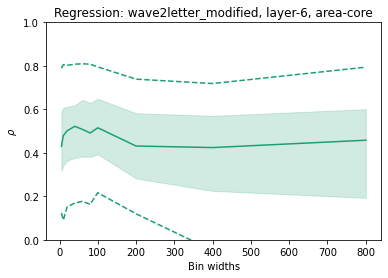

In [9]:
model_name = 'wave2letter_modified'
layer = 6
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

Reading existing dataframe.
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 5.0, num_samples: 3314...


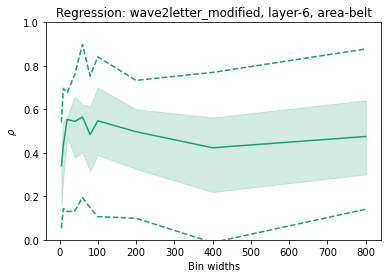

In [10]:
model_name = 'wave2letter_modified'
layer = 6
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

#### whisper_tiny

In [12]:
model_name = 'whisper_tiny'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

Reading existing dataframe.
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_sampling_rate_opt_neural_delay_corr_results.csv


Reading existing dataframe.
Computing null distribution for bin_width: 5.0, num_samples: 3314...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...


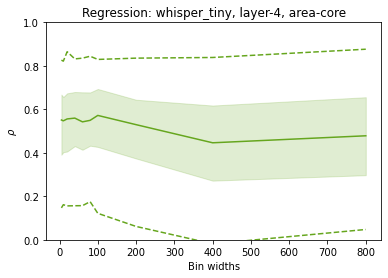

In [13]:
model_name = 'whisper_tiny'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

Reading existing dataframe.
Computing null distribution for bin_width: 5.0, num_samples: 3314...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...


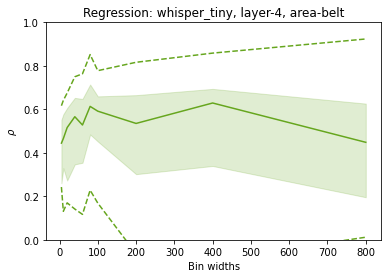

In [14]:
model_name = 'whisper_tiny'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

##### whisper_base

In [15]:
model_name = 'whisper_base'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

Reading existing dataframe.
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_sampling_rate_opt_neural_delay_corr_results.csv


Reading existing dataframe.
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 5.0, num_samples: 3314...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...


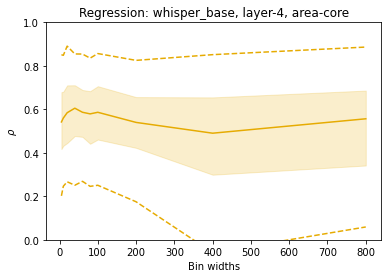

In [16]:
model_name = 'whisper_base'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

Reading existing dataframe.
Computing null distribution for bin_width: 20.0, num_samples: 832...
Computing null distribution for bin_width: 40.0, num_samples: 419...
Computing null distribution for bin_width: 10.0, num_samples: 1658...
Computing null distribution for bin_width: 5.0, num_samples: 3314...
Computing null distribution for bin_width: 60.0, num_samples: 281...
Computing null distribution for bin_width: 80.0, num_samples: 213...
Computing null distribution for bin_width: 100.0, num_samples: 170...
Computing null distribution for bin_width: 200.0, num_samples: 85...
Computing null distribution for bin_width: 400.0, num_samples: 45...
Computing null distribution for bin_width: 800.0, num_samples: 24...


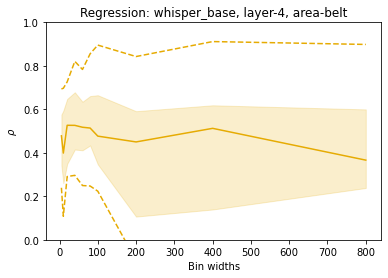

In [17]:
model_name = 'whisper_base'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=True
)

#### with different normalizer at each bin_width..

##### deepspeech2

In [32]:
model_name = 'deepspeech2'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)

Reading existing dataframe.


In [33]:
corr_obj.set_normalizers()

Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_sampling_rate_opt_neural_delay_corr_results.csv


Reading existing dataframe.


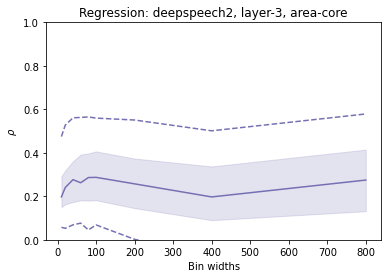

In [34]:
model_name = 'deepspeech2'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

Reading existing dataframe.


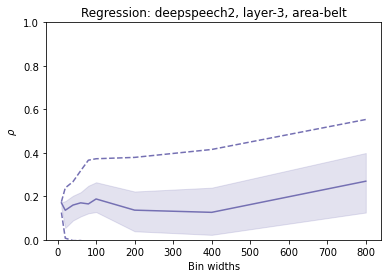

In [35]:
model_name = 'deepspeech2'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

##### speech2text

In [36]:
model_name = 'speech2text'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

Reading existing dataframe.
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_sampling_rate_opt_neural_delay_corr_results.csv


Reading existing dataframe.


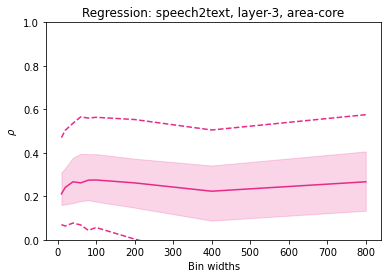

In [37]:
model_name = 'speech2text'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

Reading existing dataframe.


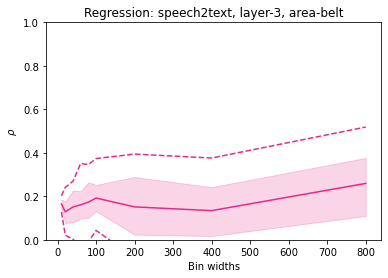

In [38]:
model_name = 'speech2text'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

##### wave2vec2

In [39]:
model_name = 'wave2vec2'
identifier = '_sampling_rate_opt_neural_delay'
res = model_name + identifier
corr_obj = Correlations(res)
corr_obj.set_normalizers()

Reading existing dataframe.
Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_sampling_rate_opt_neural_delay_corr_results.csv


Reading existing dataframe.


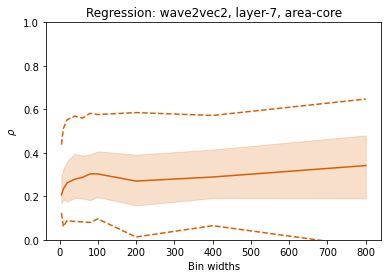

In [40]:
model_name = 'wave2vec2'
layer = 7
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

Reading existing dataframe.


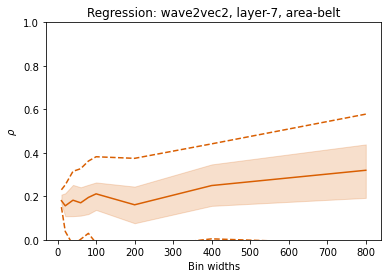

In [41]:
model_name = 'wave2vec2'
layer = 7
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

#### with same normalizer at all bin_widths...

In [3]:
corr_baseline = corr_obj.get_baseline_corr_for_area(neural_area='core')

Reading existing dataframe.


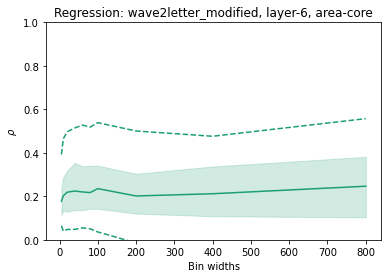

In [27]:
model_name = 'wave2letter_modified'
layer = 6
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

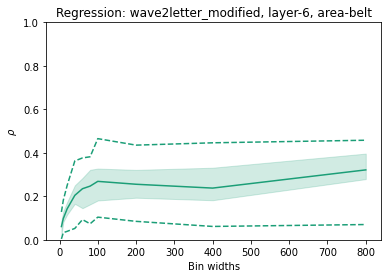

In [6]:
model_name = 'wave2letter_modified'
layer = 6
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

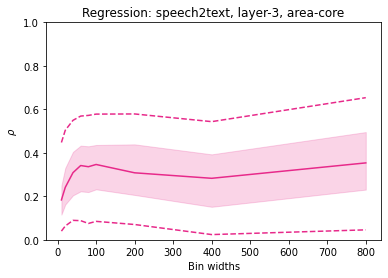

In [11]:
model_name = 'speech2text'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

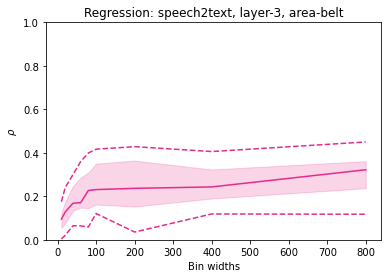

In [16]:
model_name = 'speech2text'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

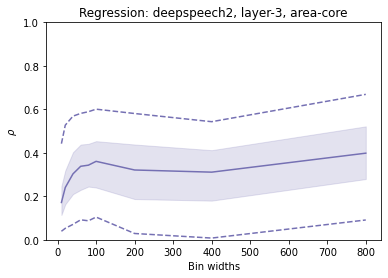

In [12]:
model_name = 'deepspeech2'
layer = 3
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

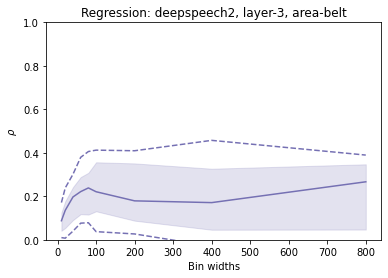

In [17]:
model_name = 'deepspeech2'
layer = 3
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

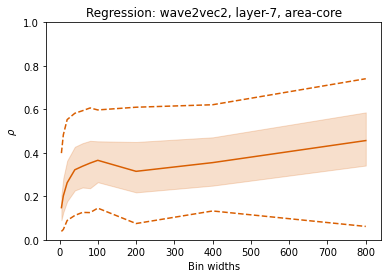

In [13]:
model_name = 'wave2vec2'
layer = 7
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

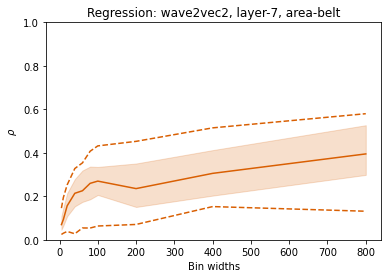

In [18]:
model_name = 'wave2vec2'
layer = 7
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

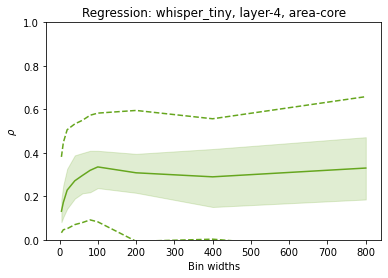

In [14]:
model_name = 'whisper_tiny'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

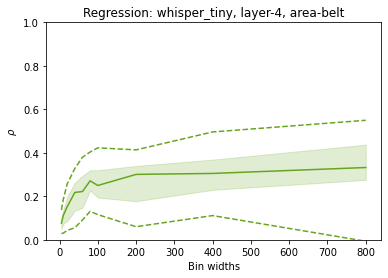

In [19]:
model_name = 'whisper_tiny'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

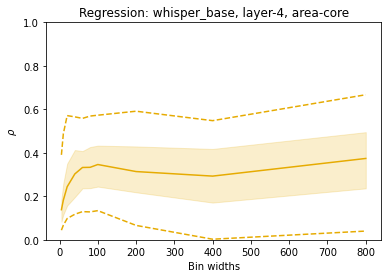

In [15]:
model_name = 'whisper_base'
layer = 4
area = 'core'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

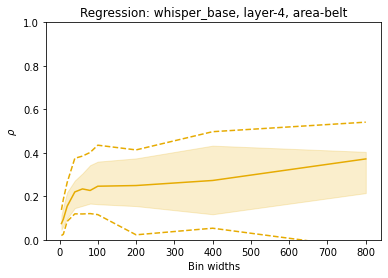

In [20]:
model_name = 'whisper_base'
layer = 4
area = 'belt'
RegPlotter.plot_one_network_layer_at_all_bin_width(
    model_name=model_name, area=area, layer=layer, normalized=False
)

#### Shaded Line plots...

In [57]:
import os
import numpy as np
import matplotlib.pylab as plt
from auditory_cortex.analyses import Correlations
from palettable.colorbrewer import qualitative
from auditory_cortex.neural_data import NeuralMetaData
from auditory_cortex.plotters.plotter_utils import PlotterUtils
from auditory_cortex import results_dir
colors = qualitative.Dark2_8.mpl_colors
from utils_jgm.tikz_pgf_helpers import tpl_save

def plot_shaded_line(data_dict, color, alpha=0.2, low_percentile=25, 
    high_percentile=75, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    medians = []
    x_coordinates = []
    lower_percentiles = []
    higher_percentiles = []
    for layer_ID, layer_data in data_dict.items():
        medians.append(np.median(layer_data))
        x_coordinates.append(layer_ID)
        lower_percentiles.append(np.percentile(layer_data, low_percentile))
        higher_percentiles.append(np.percentile(layer_data, high_percentile))
    
    ax.plot(x_coordinates, medians, color=color)
    ax.fill_between(x=x_coordinates, y1=lower_percentiles, y2=higher_percentiles,
    alpha=alpha, color=color)
    

def save_tikz(file_name):
    file_name = file_name+'.tex'
    tikz_dir = os.path.join(results_dir, 'tikz_plots')
    if not os.path.exists(tikz_dir):
        os.makedirs(tikz_dir)
    extra_axis_parameters = {
        'width=\\figwidth',
        'height=\\figheight',
        'every x tick label/.append style={rotate=90}',
        'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
    }
    tpl_save(
        filepath=os.path.join(tikz_dir, file_name),
        extra_axis_parameters=extra_axis_parameters,
        tex_relative_path_to_data='pngs',
        extra_lines_start={
            '\\providecommand{\\figwidth}{5.7in}%',
            '\\providecommand{\\figheight}{2.0in}%',
            '\\providecommand{\\thisXticklabelopacity}{1.0}%',
        },
    )


In [36]:
from auditory_cortex.analyses import Correlations
model_name = 'wave2letter_modified'
# res = 'wave2vec2'

# res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'
id = '_opt_neural_delay'
result = model_name + id
corr_obj = Correlations(result)
len(corr_obj.get_all_sessions())

45

### Core

In [ ]:
model_names = ['wave2letter_modified', 'wave2vec2',
'deepspeech2', 'speech2text', 'whisper_tiny', 
'whisper_base']
id = '_opt_neural_delay'
layer_wise_data = {}
mdata = NeuralMetaData()
area = 'core'
sessions = mdata.get_all_sessions(area=area)

for model_name in model_names:

    result = model_name + id
    corr_obj = Correlations(result)
    bin_width = 20
    delay = 0
    N_sents = 499
    threshold = 0.068
    normalized=True
    ax, layer_spread = corr_obj.box_plot_correlations(
        sessions=sessions,
        bin_width=bin_width, delay=delay, threshold=threshold,
        N_sents=N_sents, normalized=normalized
        )
    layer_wise_data[model_name] = layer_spread



In [ ]:
def get_all_layers_for_bin_width(self, bin_width=20, delay=0, 
        N_sents=499):

        



In [ ]:
plot_line_with_shaded_region()

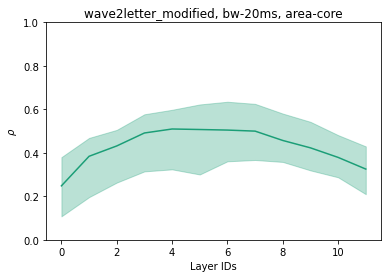

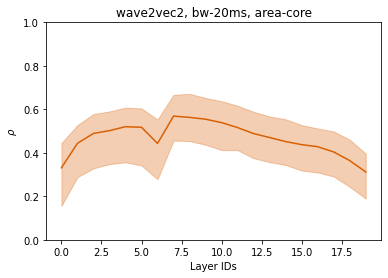

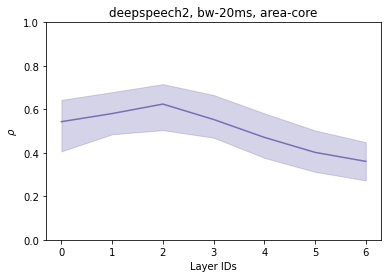

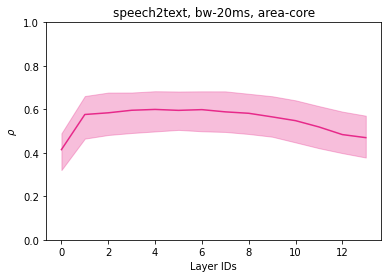

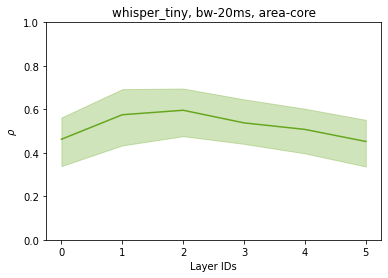

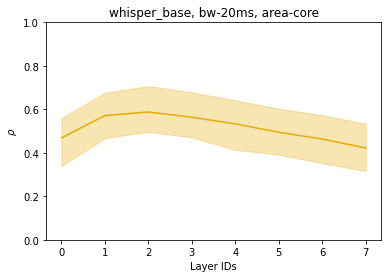

In [5]:
for ind, (model_name, layer_spread) in enumerate(layer_wise_data.items()):
    alpha = 0.2
    color = colors[ind]
    plot_shaded_line(layer_spread, color=color, alpha=alpha)
    plt.title(f"{model_name}, bw-{bin_width}ms, area-{area}")
    plt.xlabel(f"Layer IDs")
    plt.ylabel(f"$\\rho$")
    plt.ylim([0,1])
    # save_tikz(f"correlation-layerwise-{area}-{model_name}")

    filepath = os.path.join(results_dir, 'tikz_plots', f"correlation-layerwise-{area}-{model_name}.tex")
    PlotterUtils.save_tikz(filepath)

### Belt

In [ ]:
model_names = ['wave2letter_modified', 'wave2vec2',
'deepspeech2', 'speech2text', 'whisper_tiny', 
'whisper_base']
id = '_opt_neural_delay'
layer_wise_data = {}
mdata = NeuralMetaData()
area = 'belt'
sessions = mdata.get_all_sessions(area=area)

for model_name in model_names:

    result = model_name + id
    corr_obj = Correlations(result)
    bin_width = 20
    delay = 0
    N_sents = 499
    threshold = 0.068
    normalized=True
    ax, layer_spread = corr_obj.box_plot_correlations(
        sessions=sessions,
        bin_width=bin_width, delay=delay, threshold=threshold,
        N_sents=N_sents, normalized=normalized
        )
    layer_wise_data[model_name] = layer_spread



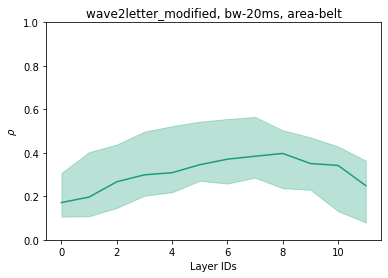

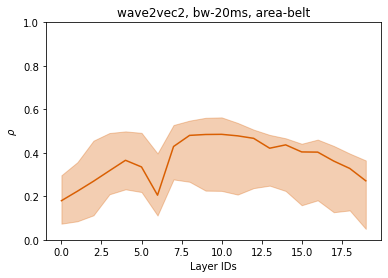

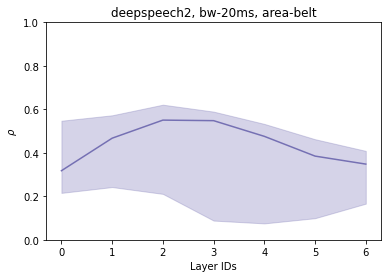

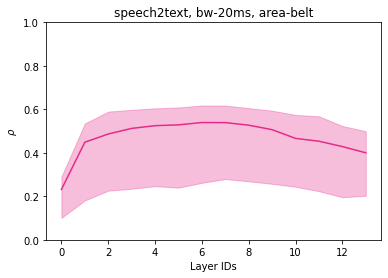

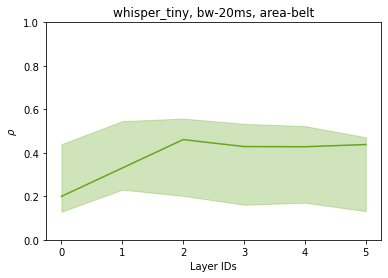

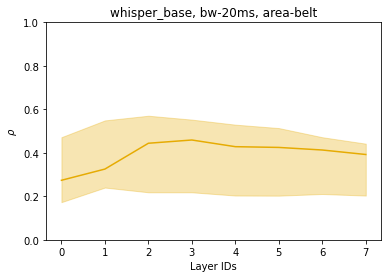

In [3]:
for ind, (model_name, layer_spread) in enumerate(layer_wise_data.items()):
    alpha = 0.2
    color = colors[ind]
    plot_shaded_line(layer_spread, color=color, alpha=alpha)
    plt.title(f"{model_name}, bw-{bin_width}ms, area-{area}")
    plt.xlabel(f"Layer IDs")
    plt.ylabel(f"$\\rho$")
    plt.ylim([0,1])
    # save_tikz(f"correlation-layerwise-{area}-{model_name}")

    filepath = os.path.join(results_dir, 'tikz_plots', f"correlation-layerwise-{area}-{model_name}.tex")
    PlotterUtils.save_tikz(filepath)

In [55]:

results_dir

'/depot/jgmakin/data/auditory_cortex/results/'

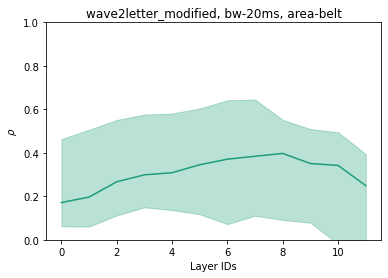

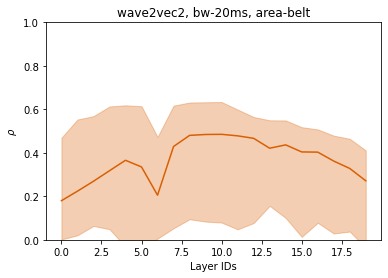

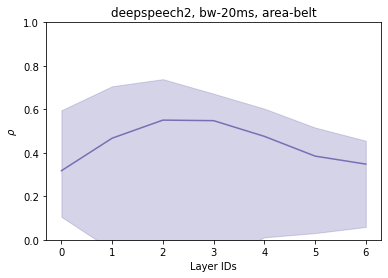

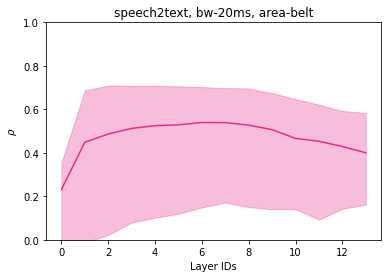

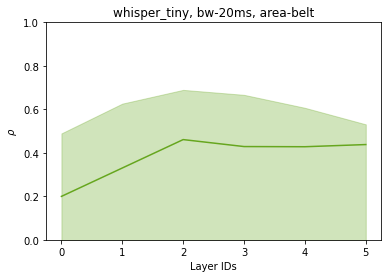

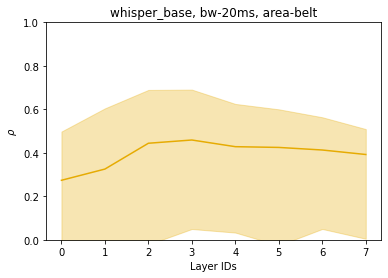

In [17]:
np.median(layer_spread[0])

0.23678645081998742

In [19]:
np.percentile(layer_spread[0], 95)

0.5395470835640118

### Combine results and ready to use....

In [39]:
from auditory_cortex.plotters.plotter_utils import PlotterUtils

i = 0
res = PlotterUtils.model_names[i]

print(f"For {res} sessions done: ")
id = '_randn_weights'
# id = '_weights_shuffled_l0'
# id = '_weights_shuffled_l1'
res += id
corr_obj = Correlations(res,
                        # normalizer_filename='modified_bins_normalizer.csv'
                        )

filepath = corr_obj.get_filepath()
os.remove(filepath)

For wave2letter_modified sessions done: 
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.


In [9]:
def combine_and_ready(
        model_name, identifiers_list, output_id, normalizer_filename=None
    ):
    """Merges results for all identifiers, copies layer types and
    sets normalizer."""

    Correlations.merge_correlation_results(
            model_name=model_name,
            file_identifiers=identifiers_list,
            idx=output_id
        )

    identifier = identifiers_list[output_id]
    Correlations.add_layer_types(
        model_name, identifier
    )

    res = model_name + '_' + identifiers_list[output_id]
    corr_obj = Correlations(res, normalizer_filename=normalizer_filename)

    corr_obj.set_normalizers()

#### whisper_small ...

In [3]:
res = 'whisper_small'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_random_weights'
id = '_random_weights'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    # print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For whisper_small sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.


FileNotFoundError: [Errno 2] No such file or directory: '/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_small_random_weights_corr_results.csv'

In [28]:
corr_obj.set_normalizers()

Normalizers updated, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_small_sampling_rate_opt_neural_delay_corr_results.csv


In [4]:
results_dir

'/depot/jgmakin/data/auditory_cortex/results/'

#### wave2letter_modified...

In [3]:
res = 'wave2letter_modified'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_random_weights'
id = '_weights_shuffled'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For wave2letter_modified sessions done: 
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 20.0 ms= 45


In [26]:
res = 'wave2letter_modified'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_10'
id = '_bins_corrected_100'
# id = '_bins_corrected_300'
# id = '_bins_corrected_500'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For wave2letter_modified sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.
For bin_width: 10.0 ms= 45
For bin_width: 20.0 ms= 45
For bin_width: 40.0 ms= 45
For bin_width: 60.0 ms= 45
For bin_width: 80.0 ms= 45
For bin_width: 100.0 ms= 45
For bin_width: 200.0 ms= 45
For bin_width: 300.0 ms= 45
For bin_width: 400.0 ms= 45
For bin_width: 500.0 ms= 45
For bin_width: 600.0 ms= 45
For bin_width: 700.0 ms= 45
For bin_width: 800.0 ms= 45


In [2]:
model_name = 'wave2letter_modified'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_poiss',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_bins_corrected_poiss_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_bins_corrected_poiss_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_bins_corrected_poiss_corr_results.csv


In [14]:
res = 'wave2letter_modified'

print(f"For {res} sessions done: ")
id = '_sampling_100'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For wave2letter_modified sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.
For bin_width: 300.0 ms= 45
For bin_width: 500.0 ms= 45
For bin_width: 600.0 ms= 45
For bin_width: 700.0 ms= 45


#### wave2vec2

In [6]:
res = 'wave2vec2'

print(f"For {res} sessions done: ")
# id = '_sampling_100'
# id = '_random_weights'
id = '_weights_shuffled'
# id = '_weights_shuffled_features'
# id = '_random_weights_features'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For wave2vec2 sessions done: 
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 20.0 ms= 45


In [3]:
model_name = 'wave2vec2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
        # 'bins_corrected_100',
ids = [
        'bins_corrected_poiss',
        'bins_corrected_poiss_features'
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_bins_corrected_poiss_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_bins_corrected_poiss_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_bins_corrected_poiss_corr_results.csv


In [9]:
# res = 'wave2letter_modified'
res = 'wave2vec2'
# res = 'speech2text'
# res = 'deepspeech2'

# res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'
print(f"For {res} sessions done: ")
id = '_sampling_rate_opt_neural_delay'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
# id = '_verification_20'
# id = '_verification_20_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For wave2vec2 sessions done: 
Reading existing dataframe.
For bin_width: 5.0 ms= 45
For bin_width: 10.0 ms= 45
For bin_width: 20.0 ms= 45
For bin_width: 40.0 ms= 45
For bin_width: 60.0 ms= 45
For bin_width: 80.0 ms= 45
For bin_width: 100.0 ms= 45
For bin_width: 200.0 ms= 45
For bin_width: 400.0 ms= 45
For bin_width: 800.0 ms= 45
For bin_width: 1000.0 ms= 45


In [14]:
res = 'wave2vec2'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_features_80'
# id = '_bins_corrected_features_60'
# id = '_bins_corrected_features_40'
# id = '_bins_corrected_features_20'
# id = '_bins_corrected_features_10'
# id = '_bins_corrected_features_100'
# id = '_bins_corrected_features_300'
# id = '_bins_corrected_features_500'
id = '_bins_corrected_features_700'
# id = '_bins_corrected_10'

normalizer_filename = 'modified_bins_normalizer.csv'
res += id
corr_obj = Correlations(res, normalizer_filename=normalizer_filename)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For wave2vec2 sessions done: 
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 700.0 ms= 45
For bin_width: 800.0 ms= 45


In [4]:
corr_obj.norm_obj.dataframe['bin_width'].unique()

array([800., 400., 200., 100., 600.])

#### speech2text

In [93]:

res = 'speech2text'
print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_weights_shuffled'
# id = '_weights_shuffled_l0'
# id = '_bins_corrected_poiss'
# id = '_bins_corrected_poiss_0'
id = '_bins_corrected_poiss_1'

# id = '_random_weights_l1'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For speech2text sessions done: 
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 20.0 ms= 41


In [95]:
model_name = 'speech2text'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_poiss',
    'bins_corrected_poiss_0',
    'bins_corrected_poiss_1'
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_bins_corrected_poiss_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_bins_corrected_poiss_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_bins_corrected_poiss_corr_results.csv


In [11]:
# res = 'wave2letter_modified'
res = 'speech2text'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For speech2text sessions done: 


Reading existing dataframe.
For bin_width: 1000.0 ms= 45


In [35]:
res = 'speech2text'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_100'
id = '_bins_corrected_l1_80'
id = '_bins_corrected_l1_60'
id = '_bins_corrected_l1_40'
id = '_bins_corrected_l1_20'
id = '_bins_corrected_l1_10'
id = '_bins_corrected_l1_100'
id = '_bins_corrected_l1_300'
id = '_bins_corrected_l1_500'
id = '_bins_corrected_l1_700'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For speech2text sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.
For bin_width: 700.0 ms= 45
For bin_width: 800.0 ms= 45


In [73]:
corr_obj.get_filepath()

'/depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_bins_corrected_20_corr_results.csv'

In [6]:
# res = 'wave2letter_modified'
# res = 'wave2vec2'
# res = 'speech2text'
res = 'deepspeech2'

# res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'

print(f"For {res} sessions done: ")
id = '_sampling_100'
# id = '_sampling_rate_opt_neural_delay_feature_extractor'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For deepspeech2 sessions done: 
Reading existing dataframe.
For bin_width: 300.0 ms= 45
For bin_width: 500.0 ms= 17


#### deepspeech2

In [5]:
res = 'deepspeech2'
# id = '_random_weights'

# id = '_weights_shuffled'
# id = '_weights_shuffled_l0'
id = '_weights_shuffled_l1'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
res += id
corr_obj = Correlations(res)

bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

For deepspeech2 sessions done: 


Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 20.0 ms= 45


In [4]:
model_name = 'deepspeech2'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
    'bins_corrected_poiss',
    'bins_corrected_poiss_0',
    'bins_corrected_poiss_1'
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_bins_corrected_poiss_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_bins_corrected_poiss_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_bins_corrected_poiss_corr_results.csv


In [14]:
# res = 'wave2letter_modified'
res = 'deepspeech2'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    # print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For deepspeech2 sessions done: 
Reading existing dataframe.
For bin_width: 1000.0 ms= 5


In [57]:
res = 'deepspeech2'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_bins_corrected_100'
id = '_bins_corrected_l0_80'
id = '_bins_corrected_l0_60'
id = '_bins_corrected_l0_40'
id = '_bins_corrected_l0_20'
id = '_bins_corrected_l0_10'
# id = '_bins_corrected_l0_100'
# id = '_bins_corrected_l0_300'
# id = '_bins_corrected_l0_500'
# id = '_bins_corrected_l0_700'


res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For deepspeech2 sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.
For bin_width: 10.0 ms= 45


#### whisper_tiny

In [17]:
res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'whisper_small'
# res = 'whisper_base'
print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_random_weights'
id = '_weights_shuffled'
res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

For whisper_tiny sessions done: 
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 20.0 ms= 45


In [5]:
model_name = 'whisper_tiny'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
        'bins_corrected_poiss',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_bins_corrected_poiss_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_bins_corrected_poiss_corr_results.csv
Writing back...!


Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_bins_corrected_poiss_corr_results.csv


In [17]:
# res = 'wave2letter_modified'
res = 'whisper_tiny'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For whisper_tiny sessions done: 
Reading existing dataframe.
For bin_width: 1000.0 ms= 45


In [12]:
res = 'whisper_tiny'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_bins_corrected_100'
# id = '_bins_corrected_10'

res += id
corr_obj = Correlations(res)

bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

For whisper_tiny sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.
For bin_width: 10.0 ms= 45
For bin_width: 20.0 ms= 45
For bin_width: 40.0 ms= 45
For bin_width: 60.0 ms= 45
For bin_width: 80.0 ms= 45
For bin_width: 100.0 ms= 45
For bin_width: 200.0 ms= 45
For bin_width: 300.0 ms= 45
For bin_width: 400.0 ms= 45
For bin_width: 500.0 ms= 45
For bin_width: 600.0 ms= 45
For bin_width: 700.0 ms= 45
For bin_width: 800.0 ms= 45


#### whisper_base

In [19]:

res = 'whisper_base'
print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
# id = '_random_weights'
id = '_weights_shuffled'

res += id
corr_obj = Correlations(res)

# # bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For whisper_base sessions done: 
Using default normalizer file...
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
For bin_width: 20.0 ms= 45


In [6]:
model_name = 'whisper_base'
output_id = 0
normalizer_filename = 'modified_bins_normalizer.csv'
ids = [
        'bins_corrected_poiss',
    ]

Correlations.combine_and_ready(model_name, ids, output_id, normalizer_filename=normalizer_filename)


Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_bins_corrected_poiss_corr_results.csv
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_bins_corrected_poiss_corr_results.csv
Writing back...!
Creating normalizer object from: modified_bins_normalizer.csv
Reading existing dataframe.
Normalizers updated FOR CONTEXT AS WELL, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_bins_corrected_poiss_corr_results.csv


In [20]:
# res = 'wave2letter_modified'
res = 'whisper_base'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_time_averaged_no_grid'

res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    # print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    print(f"For bin_width: {bin_width:03} ms= {len(data['layer'].unique())}")

For whisper_base sessions done: 


Reading existing dataframe.
For bin_width: 1000.0 ms= 8


In [10]:
res = 'whisper_base'

print(f"For {res} sessions done: ")
# id = '_sampling_rate_opt_neural_delay'
id = '_bins_corrected_100'



res += id
corr_obj = Correlations(res)

# bin_widths = [5, 10, 20, 40, 60, 80, 100, 200, 400, 800]
bin_widths = np.sort(corr_obj.data['bin_width'].unique())
for bin_width in bin_widths:
    data = corr_obj.get_selected_data(bin_width=bin_width)
    print(f"For bin_width: {bin_width:03} ms= {len(data['session'].unique())}")
    # print(f"For bin_width: {bin_width:03} ms= {data['layer'].unique()}")

For whisper_base sessions done: 
Creating normalizer object from: corr_normalizer.csv
Reading existing dataframe.
For bin_width: 10.0 ms= 45
For bin_width: 20.0 ms= 45
For bin_width: 40.0 ms= 45
For bin_width: 60.0 ms= 45
For bin_width: 80.0 ms= 45
For bin_width: 100.0 ms= 45
For bin_width: 200.0 ms= 45
For bin_width: 300.0 ms= 45
For bin_width: 400.0 ms= 45
For bin_width: 500.0 ms= 45
For bin_width: 600.0 ms= 45
For bin_width: 700.0 ms= 45
For bin_width: 800.0 ms= 45


In [ ]:
corr_obj.set

In [25]:
corr_obj.get_normalizer_threshold(20, False)

Reading exisiting normalizer thresholds...


0.05733905395030093

#### Earlier made plots..

In [76]:
corr_obj.data[corr_obj.data['bin_width']==5]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays


In [21]:
corr_obj.data[corr_obj.data['bin_width']==5]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays


In [79]:
corr_obj.data[corr_obj.data['bin_width']==20]

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,opt_delays


In [21]:
corr_obj.get_selected_data()['layer'].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [7]:
corr_file = res
filename = f'{corr_file}_corr_results.csv'
corr_file_path = os.path.join(saved_corr_dir, filename)
data1 = pd.read_csv(corr_file_path)

In [6]:
# model_name = 'whisper_tiny'
# model_name = 'whisper_test'
# model_name = 'whisper_base'
model_name = 'wave2letter_modified'
id = 'sampling_rate_opt_neural_delay'

# id = 'opt_neural_delay'
filler = ''
if id != '':
    filler = '_'
model_identifier = model_name + filler + id
# add layer types...
print("adding layer types...")
CorrelationUtils.add_layer_types(model_name, id)
print("Copying normalizer...")
CorrelationUtils.copy_normalizer(model_identifier)

adding layer types...
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Writing back...!
Copying normalizer...
Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv
Reading normalizers from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_sampling_rate_opt_neural_delay_corr_results.csv


Baseline median: 0.158


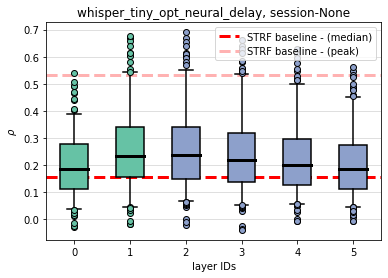

In [8]:
res = 'whisper_tiny'
# res = 'whisper_test'
# res = 'wave2vec2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

Baseline median: 0.158


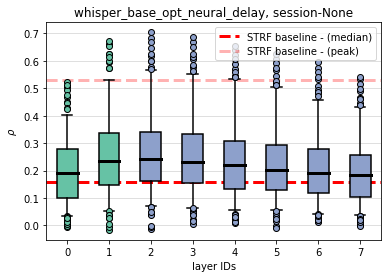

In [12]:
res = 'whisper_base'
# res = 'whisper_test'
# res = 'wave2vec2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

Baseline median: 0.158


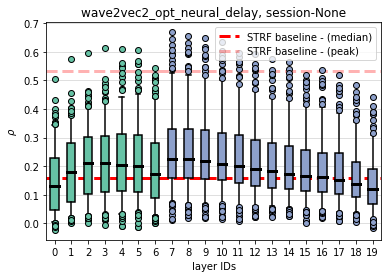

In [4]:
# res = 'whisper_tiny'
res = 'wave2vec2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

Baseline median: 0.158


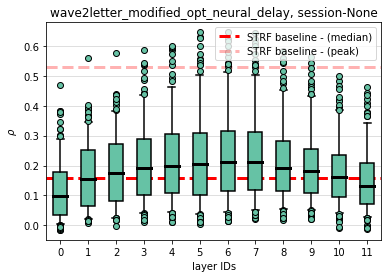

In [6]:
# res = 'whisper_tiny'
res = 'wave2letter_modified'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

Baseline median: 0.158


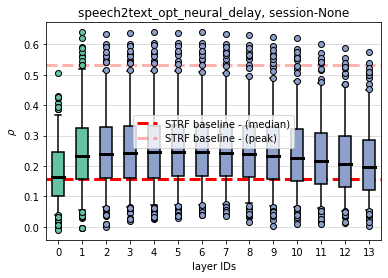

In [7]:
# res = 'whisper_tiny'
res = 'speech2text'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

Baseline median: 0.158


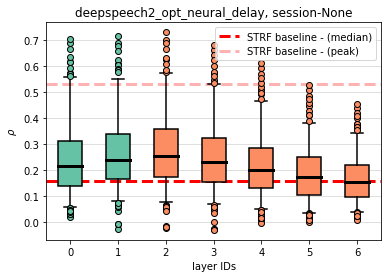

In [9]:
res = 'deepspeech2'
id = '_opt_neural_delay'
res += id
corr_obj = analysis.Correlations(res)
out = corr_obj.box_plot_correlations(
    threshold=0.068,
    )

In [12]:
for layer, dist in out[1].items():
    print(f"Layer-{layer}, median: {np.median(dist):.2f}, max: {np.max(dist):.2f}")

Layer-0, median: 0.19, max: 0.54
Layer-1, median: 0.23, max: 0.68
Layer-2, median: 0.24, max: 0.69
Layer-3, median: 0.22, max: 0.66
Layer-4, median: 0.20, max: 0.63
Layer-5, median: 0.19, max: 0.56


##### adding layer types and normalizer....

In [4]:
corr_obj.add_layer_types('mix')
CorrelationUtils.copy_normalizer(res)

Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/ensemble_opt_neural_delay_corr_results.csv
Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/ensemble_opt_neural_delay_corr_results.csv
Reading normalizers from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/ensemble_opt_neural_delay_corr_results.csv


Baseline median: 0.158


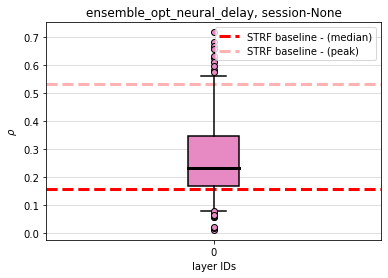

In [10]:
model_name = 'ensemble'
id = '_opt_neural_delay'
model_name += id
session = 200206
threshold = 0.068
delay = 48
corr_obj = analysis.Correlations(model_name)
ax = corr_obj.box_plot_correlations(threshold=threshold,
                                    delay=delay,
                                    # normalized=True,
                                    # sessions=[session]
                                    )

In [11]:
data_layers = ax[1]
for k, v in data_layers.items():
    print(f"L-{k}, median: {np.median(v):.2f}, max: {np.max(v):.2f}")

L-0, median: 0.23, max: 0.72


In [13]:
bin_width = 20
model = models_list[0]
model_name = model['model_name'] + '_opt_neural_delay'
corr_obj = analysis.Correlations(model_name)
select_data = corr_obj.get_session_data(
            threshold=threshold, bin_width=bin_width
        )

# ax = corr_obj.box_plot_correlations(threshold=threshold,
#                                     delay=delay,
#                                     # normalized=True,
#                                     # sessions=[session]
#                                     )


### Evaluating the ensemble model...

##### function definations...

In [56]:
models_list = [
    {
        'model_name': 'wave2letter_modified',
        'layer': 6,
        'opt_neural_delay': 37.75,
        'layer_type': 'conv'
    },
    {
        'model_name': 'speech2text',
        'layer': 4,
        'opt_neural_delay': 49.83,
        'layer_type': 'transformer'
    },
    {
        'model_name': 'wave2vec2',
        'layer': 7,
        'opt_neural_delay': 49.23,
        'layer_type': 'transformer'
    },
    {
        'model_name': 'deepspeech2',
        'layer': 2,
        'opt_neural_delay': 54.73,
        'layer_type': 'rnn'
    },
    {
        'model_name': 'ensemble',
        'layer': 0,
        'opt_neural_delay': 54.73,
        'layer_type': 'mix'
    },
]
def plot_box_and_whiskers(data_spread, colors, ax=None, lw=1.5):
    """
    Args:
        data_spread (dict): dict of distributions... 
        colors (list): list of colors, len(colors)=len(data_spread) 
    """
    if ax is None:
        fig, ax = plt.subplots()
        # plotting function
    median_lines = dict(color='k', linewidth=lw*2)  
    other_lines = dict(color='k', linewidth=lw)
    bplot = ax.boxplot(data_spread.values(), positions = np.arange(1, len(data_spread.keys())+1),
                labels=data_spread.keys(),
                whis=[5,95],
                capprops=other_lines,
                whiskerprops=other_lines,
                medianprops=median_lines,
                patch_artist=True
                )
    
    # setting the colors of the boxes as per layer type..
    for color, box, flier in zip(colors, bplot['boxes'], bplot['fliers']):
        box.set(
            facecolor = color,
            linewidth=lw
        )
        flier.set(
                markeredgecolor='k',
                markerfacecolor=color,
        )
    return ax


def compare_ensemble(models_list, threshold=0.068, bin_width=20, 
                     normalized=False, verbose=True):
    delay = 0
    column = 'test_cc_raw'
    aug_title = ''
    if normalized:
        column = 'normalized_test_cc'
        aug_title = ', norm'

    data_spread = {}
    colors = []
    for model in models_list:
        # model = models_list[0]
        model_name = model['model_name']
        if 'ensemble' in model_name:
            delay = 48
        layer_type = model['layer_type']
        layer = model['layer']
        corr_obj = analysis.Correlations(model_name+'_opt_neural_delay')
        select_data = corr_obj.get_selected_data(
                    threshold=threshold, bin_width=bin_width, delay=delay, N_sents=499,
                    layer=layer
                )
        ids = select_data[select_data['layer']==layer].index
        data_spread[model_name] = np.array(select_data.loc[ids, column]).squeeze()
        colors.append(corr_obj.fill_color[layer_type])
        if verbose:
            print(f"{model_name:20}: Med = {np.median(data_spread[model_name]):.2f},\
            max: {np.max(data_spread[model_name]):.2f}")
    # plotting box and whiskers
    ax = plot_box_and_whiskers(data_spread, colors)
    ax.set_title(f"Ensemble vs individual models{aug_title}")
    ax.set_xlabel('models')
    ax.grid(color='grey', axis='y', linestyle='-', linewidth = 0.5, alpha=0.5)

    return ax

##### plots

wave2letter_modified: Med = 0.21,            max: 0.65
speech2text         : Med = 0.25,            max: 0.64
wave2vec2           : Med = 0.23,            max: 0.67
deepspeech2         : Med = 0.25,            max: 0.73
ensemble            : Med = 0.23,            max: 0.72


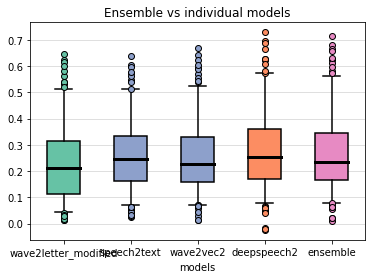

In [61]:
ax= compare_ensemble(models_list=models_list,
                normalized=False
                )

wave2letter_modified: Med = 0.49,            max: 0.89
speech2text         : Med = 0.59,            max: 0.92
wave2vec2           : Med = 0.56,            max: 0.91
deepspeech2         : Med = 0.61,            max: 0.98
ensemble            : Med = 0.58,            max: 0.97


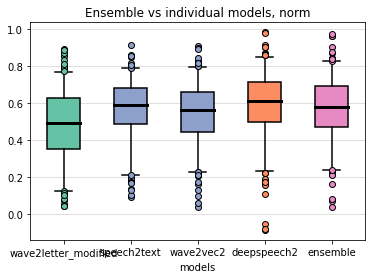

In [62]:
ax = compare_ensemble(models_list=models_list,
                normalized=True
                )

### merge corr results...

In [38]:
model_name = 'wave2vec2'
output_id = 1

ids = [
        'all_opt_delays_feature_extractor',
        'all_opt_delays',
    ]
# ids = [
#         'opt_neural_delay_1_third_feature_extractor',
#         'opt_neural_delay_1_third',

#     ]
CorrelationUtils.merge_correlation_results(
        model_name=model_name,
        file_identifiers=ids,
        idx=output_id
    )

Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2vec2_all_opt_delays_corr_results.csv


### add layer types and copy normalizer..

In [66]:
# model_name = 'wave2letter_modified'
# model_name = 'speech2text'
# model_name = 'deepspeech2'


# model_name = 'ensemble'
# model_name = 'whisper_tiny'
model_name = 'whisper_base'
# model_name = 'wave2vec2'


ids = [
    # 'robust1'
    # 'normal_109'
    # 'robust_26'
    # 'opt_neural_delay'
    'sampling_rate_opt_neural_delay'
    # 'opt_neural_delay_1_third',
    # 'opt_neural_delay_2_third',
    # 'opt_neural_delay_3_third'
]

# id = 'opt_neural_delay_2_third'

for id in ids:
    filler = ''
    if id != '':
        filler = '_'
    model_identifier = model_name + filler + id

    # add layer types...
    print("adding layer types...")
    CorrelationUtils.add_layer_types(model_name, id)

    print("Copying normalizer...")
    CorrelationUtils.copy_normalizer(model_identifier)



adding layer types...
reading from /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_sampling_rate_opt_neural_delay_corr_results.csv
Writing back...!
Copying normalizer...
Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_sampling_rate_opt_neural_delay_corr_results.csv
Reading normalizers from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_sampling_rate_opt_neural_delay_corr_results.csv


In [61]:
# model_name = 'speech2text'
model_name = 'deepspeech2'


id = '_sampling_rate_opt_neural_delay'
corr_file = model_name + id

In [62]:
filename = f'{corr_file}_corr_results.csv'
corr_file_path = os.path.join(saved_corr_dir, filename)
data1 = pd.read_csv(corr_file_path)
print(f"Reading file from: \n {corr_file_path}")
# data1['session'].unique()

ids = data1[data1['session']==0].index
data1.drop(ids, inplace=True)
print(f"Writing back..")
data1.to_csv(corr_file_path, index=False)


Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/deepspeech2_sampling_rate_opt_neural_delay_corr_results.csv
Writing back..


In [42]:
# session = sessions[0]
select_data = data1[data1['session']==session]
channels = select_data['channel'].unique()

In [43]:
channels

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [44]:
ch = channels[0]

In [45]:

ids = select_data[select_data['channel'] == ch].index

# norm = data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 

# data1.loc[ids, 'normalizer'] = norm

In [49]:
data2[(data2['session']==session) &(data2['channel']==ch)]['normalizer'].head(1).item() 


0.0102169443958573

In [ ]:

for session in sessions:


data1.to_csv(corr_file_path, index=False)
print(f"Normalizer updated and written back to file: \n {corr_file_path}")

In [ ]:
corr_obj

### analyzing...

Baseline median: 0.158


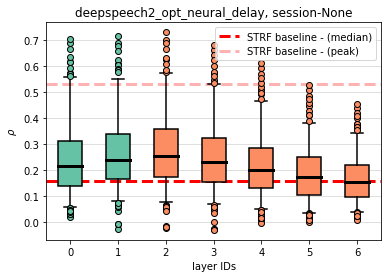

In [27]:
# model_name = 'ensemble'
# model_name = 'wave2letter_modified'
# model_name = 'speech2text'
# model_name = 'wave2vec2'
model_name = 'deepspeech2'
# id = 'opt_neural_delay_1_third'
id = 'opt_neural_delay'
# id = 'robust1'
# id = 'normal_109'
# id = ''
filler = ''
if id != '':
    filler = '_'
session = 200206
model_identifier = model_name + filler + id
corr_obj = analysis.Correlations(model_identifier)
ax = corr_obj.box_plot_correlations(threshold=0.068,
                                    # normalized=True
                                    # sessions=[session]
                                    )
# len(corr_obj.get_all_sessions())

In [28]:
data_layers = ax[1]
for k, v in data_layers.items():
    print(f"L-{k}, median: {np.median(v):.2f}, max: {np.max(v):.2f}")

L-0, median: 0.22, max: 0.70
L-1, median: 0.24, max: 0.71
L-2, median: 0.25, max: 0.73
L-3, median: 0.23, max: 0.68
L-4, median: 0.20, max: 0.61
L-5, median: 0.17, max: 0.53
L-6, median: 0.15, max: 0.45


In [29]:
print(f"Mean optimal delays \n for '{model_identifier}', :")
corr_obj.get_selected_data(
            # layer=6,
            # session=200206,
            bin_width=20, delay=0, N_sents=499, threshold=0.1
        ).groupby(['layer'], as_index=False).mean()['opt_delays']

Mean optimal delays 
 for 'deepspeech2_opt_neural_delay', :


0    42.152318
1    55.596026
2    54.735099
3    57.814570
4    61.192053
5    66.357616
6    71.490066
Name: opt_delays, dtype: float64

In [13]:
# CorrelationUtils.copy_normalizer(model_identifier)

Reading file from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_corr_results.csv
Reading normalizers from: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_normalizer2_corr_results.csv
Normalizer updated and written back to file: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wave2letter_modified_corr_results.csv


In [40]:
models_list = [
    {
        'model_name': 'wave2letter_modified',
        'layer': 6,
        'opt_neural_delay': 37.75,
    },
    {
        'model_name': 'speech2text',
        'layer': 4,
        'opt_neural_delay': 49.83,
    },
    # {
    #     'model_name': 'wave2vec',
    #     'layer': 8
    # },
    {
        'model_name': 'wave2vec2',
        'layer': 7,
        'opt_neural_delay': 49.23,
    },
    {
        'model_name': 'deepspeech2',
        'layer': 2,
        'opt_neural_delay': 54.73,
    },
]

opt_delays = []
for model in models_list:
    opt_delays.append(model['opt_neural_delay'])
avg_delay = sum(opt_delays)/len(opt_delays)
avg_delay = int(avg_delay + 0.5) 
# avg_delay = int(avg_delay/5.0 + 0.5)
print(avg_delay)

48


In [37]:
int(avg_delay/5.0 + 0.5)*5

50

In [19]:
model_identifier

'wave2letter_modified_opt_neural_delay'

Baseline median: 0.183


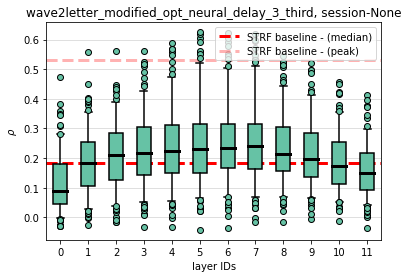

In [6]:
corr_obj = analysis.Correlations(model_identifier)

ax = corr_obj.box_plot_correlations(threshold=0.1)

In [16]:
from auditory_cortex import analysis

model_name = 'wave2letter_modified'
# model_name = 'wave2vec'
# model_name = 'deepspeech2'
# id = 'opt_neural_delay_3_third'
# id = 'opt_neural_delay_2_third'
# id = 'normal_109'
id = 'robust_26'

filler = ''
if id != '':
    filler = '_'
model_identifier = model_name + filler + id
corr = analysis.Correlations(model_name=model_identifier)
corr.get_all_sessions().shape

(43,)

In [3]:
import os
import pandas as pd
from auditory_cortex import saved_corr_dir

strf_file = 'STRF_3_third_corr_results.csv'
file_path = os.path.join(saved_corr_dir, strf_file)
df = pd.read_csv(file_path)
len(df['session'].unique())

45

array([180413., 180420., 180501.])

In [10]:
from auditory_cortex import config
from auditory_cortex import subject_to_session


normalizer_model = 'wave2letter_modified_normalizer2'

corr_obj = analysis.Correlations(normalizer_model)

data_dir = config['neural_data_dir']
bad_sessions = config['bad_sessions']

## read the sessions available in data_dir
sessions = np.array(os.listdir(data_dir))
sessions = np.delete(sessions, np.where(sessions == "out_sentence_details_timit_all_loudness.mat"))
for s in bad_sessions:
    sessions = np.delete(sessions, np.where(sessions == s))
sessions = np.sort(sessions)

In [12]:

corr_obj.get_selected_data(bin_width=20, delay=0, N_sents=499, threshold=0.068)['session'].unique().shape

(18,)

In [17]:
# session = sessions[0]
threshold = 0.068
num_sig_sessions = 0
total_num_channels = 0
total_sig_channels = 0
for session in sessions:
    channels = os.listdir(os.path.join(data_dir,session))
    num_channels = len(channels)
    subject = channels[0][:1]
    corr_channels = corr_obj.get_all_channels(session)
    sig_channels = corr_obj.get_good_channels(session, threshold=threshold)

    total_num_channels += num_channels
    total_sig_channels += len(sig_channels)
    if len(sig_channels) > 0:
        num_sig_sessions += 1
    sub = [k for k,v in subject_to_session.items() if int(session) in v][0]
    # print(session, end=', ')
    # print(num_channels, end=' - ')
    # print(len(corr_channels), end=', ')
    # print(subject, end='')
    # print(sub, end=', ')
    # print(len(sig_channels))

print(f"Total recording sessions: {len(sessions)}")
print(f"Number of sig sessions: {num_sig_sessions}")
print(f"Total recording channels: {total_num_channels}")
print(f"Number of sig channels: {total_sig_channels}")
    


Total recording sessions: 45
Number of sig sessions: 18
Total recording channels: 1920
Number of sig channels: 199


### visualizing box plots...

In [1]:
session = 200206
threshold = 0.068
normalized_list = [False]#, True]
delta_corr_list = [False]#, True]
bin_width = 20
delay = 0
save_fig = False
y_axis_lim = 0.7

identifier = ''
# model_name = 'wave2letter_modified'
# identifier = 'test7'
# identifier = 'test8'
# identifier = 'test9'

# identifier = 'normalizer2'

# identifier = 'RF_delayed_with_audio_zeropad'
# identifier = 'opt_delay_with_audio_zeropad'
# identifier = 'opt_delay_L6_D0'
# identifier = 'opt_delays_final'
# identifier = 'all_opt_delays'
# identifier = 'opt_neural_delay'


# model = 'wave2letter_modified_opt_delays'
# model = 'wave2letter_modified_RF_delayed'
# model = 'wave2letter_modified'
# model = 'wave2vec2_encoder'
# model = 'wave2vec2_feature_extractor'

# model_name = 'wave2letter_modified'
model_name = 'wave2vec2'
# model_name = 'whisper'
# model_name = 'speech2text'
# identifier = 'opt_delay'
# identifier = 'basic'
# identifier = 'RF_delay'
# identifier = 'neural_delay_only_l0'

# model_name = 'deepspeech2'
# identifier = 'bi_lstm'

# model = 'deepspeech2_bi_lstm'
# model = 'speech2text_initial'
# model = 'speech2text'
# model = 's2t_updated'

# model = 'w2l_original'

# model = 'deepspeech2_rnn_1st_half'
# model = 'deepspeech2_rnn_2nd_half'
# model = 'wave2letter_modified_delay_zeropad'
# delay = 60
filler = ''
if identifier != '':
    filler = '_'
model_identifier = model_name + filler + identifier



for normalized in normalized_list:
    for delta_corr in delta_corr_list:

        corr_obj = analysis.Correlations(model_identifier)


        print(len(np.unique(corr_obj.get_all_sessions())))
        ax, layers_data = corr_obj.box_plot_correlations(
            # session,
            normalized=normalized, threshold=threshold, delta_corr=delta_corr, bin_width=bin_width,
            delay=delay, y_axis_lim=y_axis_lim
            )


        post_str = 'rho'
        if normalized:
            post_str = post_str + '_' + 'normalized'
        if delta_corr:
            post_str = 'delta_' + post_str
        fig_name = f"{model_identifier}_{post_str}.jpg"


        # NIPS_dir = 'C\:\Users\\ahmedb\\Desktop\\PhD\\Academic\\Makin\'s Lab\\auditory_cortex\\Results\\NIPS'
        saved_figures = os.path.join(results_dir, 'saved_figures', 'correlations')
        filepath = os.path.join(saved_figures, model_name, fig_name)
        if save_fig:
            plt.savefig(filepath)

NameError: name 'analysis' is not defined

In [7]:
corr_obj.data['layer'].unique()

array([0., 1., 2., 3., 4., 5., 6.])

In [16]:
print(f"Results for '{model_identifier}':")
for key, value in layers_data.items():
    print(f"Layer-{key}: {np.median(value):.3f}")

Results for 'wave2vec2_neural_delay_only':
Layer-0: 0.169
Layer-1: 0.222
Layer-2: 0.246
Layer-3: 0.248
Layer-4: 0.255
Layer-5: 0.259
Layer-6: 0.225
Layer-7: 0.270
Layer-8: 0.263
Layer-9: 0.254
Layer-10: 0.244
Layer-11: 0.235
Layer-12: 0.219
Layer-13: 0.218
Layer-14: 0.208
Layer-15: 0.202
Layer-16: 0.195
Layer-17: 0.190
Layer-18: 0.174
Layer-19: 0.148


In [40]:
print(f"Results for '{model_identifier}':")
for key, value in layers_data.items():
    print(f"Layer-{key}: {np.median(value):.3f}")

Results for 'wave2letter_modified':
Layer-0: 0.095
Layer-1: 0.175
Layer-2: 0.195
Layer-3: 0.215
Layer-4: 0.221
Layer-5: 0.223
Layer-6: 0.231
Layer-7: 0.240
Layer-8: 0.225
Layer-9: 0.209
Layer-10: 0.190
Layer-11: 0.164


### Analyzing optimal delays...

In [8]:
print(f"Mean optimal delays \n for '{model_identifier}', :")
corr_obj.get_selected_data(
            # layer=6,
            # session=200206,
            bin_width=20, delay=0, N_sents=499, threshold=0.1
        ).groupby(['layer'], as_index=False).mean()['opt_delays']

Mean optimal delays 
 for 'wave2vec_neural_delay_only', :


0     62.682119
1     38.443709
2     35.894040
3     35.927152
4     35.960265
5     37.019868
6     37.284768
7     35.364238
8     33.973510
9     34.337748
10    35.165563
11    35.496689
12    36.225166
13    37.317881
14    40.761589
15    42.682119
16    42.185430
17    44.271523
18    45.860927
Name: opt_delays, dtype: float64

In [20]:
select_data = corr_obj.get_selected_data(
            layer=6, bin_width=20, delay=0, threshold=0.1, N_sents=499
        ).groupby(['session'], as_index=False).mean()

sessions = select_data['session'].unique()

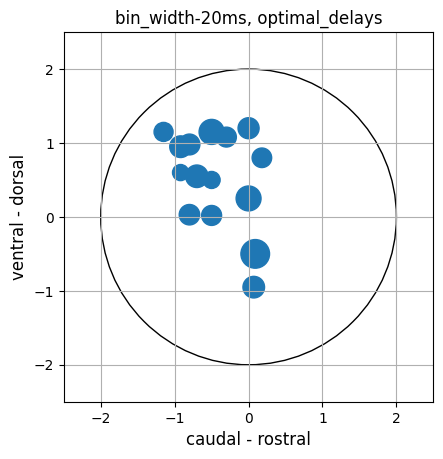

In [27]:
s = 5
opt_delays = []

x_coordinates = []
y_coordinates = []
peak_layers = []
peak_median_corr = []   
for session in sessions:
    opt_delays.append(select_data.loc[select_data['session']==session, ['opt_delays']]*s)
    c_x, c_y = session_to_coordinates[int(session)]
    x_coordinates.append(c_x)
    y_coordinates.append(c_y)

    # print(f"session: {session}, opt_delay: {opt_delay}")
fig, ax = plt.subplots()
fontsize = 12
scatt = ax.scatter(
            x_coordinates, y_coordinates, s=opt_delays, 
            # c=peak_layers, cmap='magma', vmin=0, vmax= num_layers, 
        )
# formating plot and adding colorbar
# adding background circle
circle = plt.Circle((0,0),2, fill=False)
ax.set_aspect(1)
ax.add_artist(circle)
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-2.5,2.5])
ax.set_title(f"bin_width-{bin_width}ms, optimal_delays", fontsize=fontsize)
ax.set_xlabel('caudal - rostral', fontsize=fontsize)
ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
plt.grid(True)
# plt.colorbar(scatt, ax=ax, label='layers')

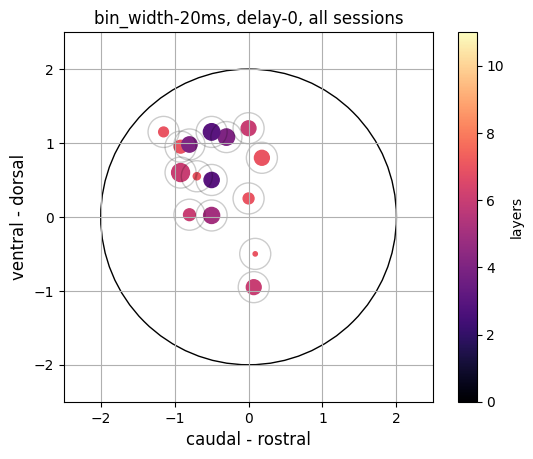

In [26]:
delay=0
corr_obj.plot_topographical_peaks(
        # unit_circles=False,
        # sessions=c_LH_sessions,
        bin_width=20,
        normalized=False,
        delay=delay,
        alpha=0.2,
        # threshold=0.05
        )

### combining corr data 

In [60]:
results_dir = os.path.join(results_dir, 'cross_validated_correlations')

### analyzing STRF model

In [6]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

In [9]:
filename = 'STRF_corr_RidgeCV.npy'
# path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
file_path = os.path.join(results_dir, filename)
baseline_corr = np.load(file_path)

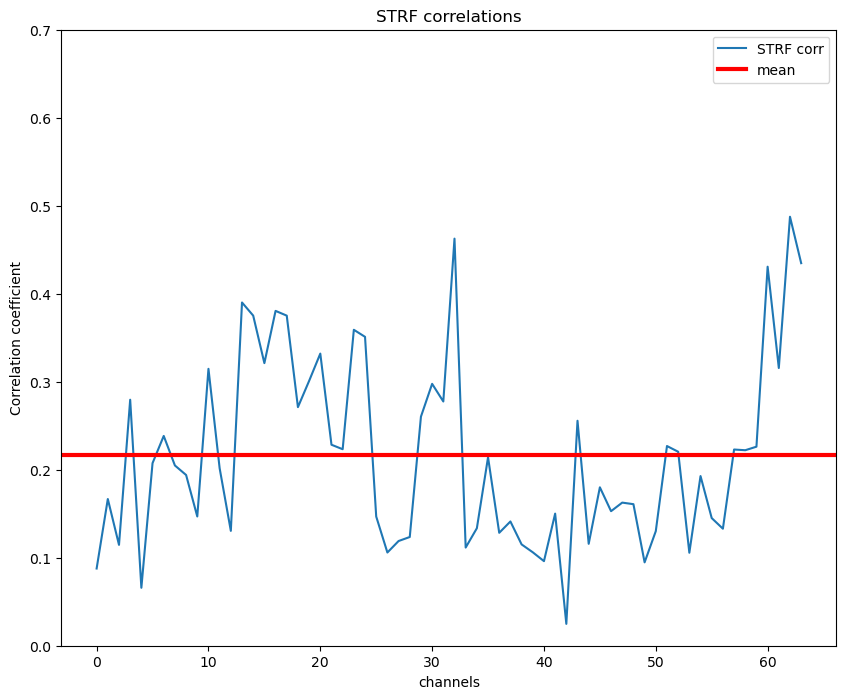

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [3]:
filename = 'STRF_corr_elasticNetCV.npy'
path = os.path.join(config.results_dir, config.corr_sub_dir, filename)
baseline_corr = np.load(path)

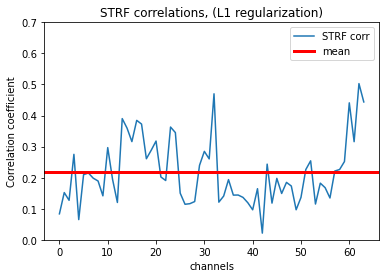

In [17]:
plt.plot(baseline_corr, label='STRF corr')
plt.title("STRF correlations, (L1 regularization)")
plt.xlabel("channels")
plt.ylabel("Correlation coefficient")
plt.ylim([0,0.7])
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, label='mean')
# plt.axhline(np.max(baseline_corr), c='gray', alpha=0.5,linewidth=5, label='peak')


plt.legend(loc='best')

In [5]:
np.mean(baseline_corr)

0.2169307859864385

### results for NIPS

In [12]:
# model_name = 'wave2letter'
# # # results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
# # filename = f"{model_name}_corr_results.csv"
# filename = 'c_w2l_correlations.csv'
# file_path = os.path.join(results_dir, filename)

# corr_obj = analysis.correlations()
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

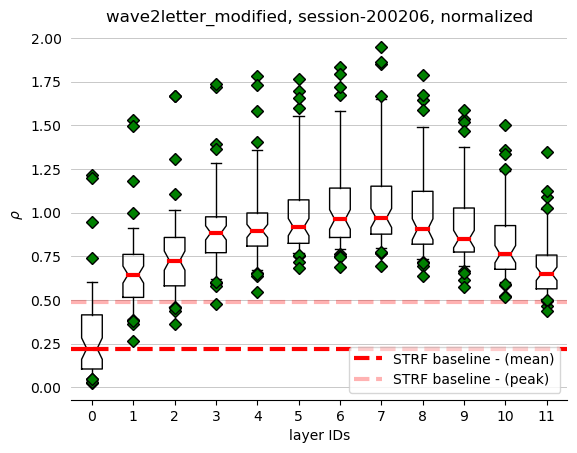

In [7]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False

ax = corr_obj.box_plot_correlations(session, normalized=normalized, threshold=threshold, delta_corr=delta_corr)

extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(results_dir, 'saved_figures', 'correlations', "correlations.tex"),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    extra_lines_start={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)



0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_20832\2367577541.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


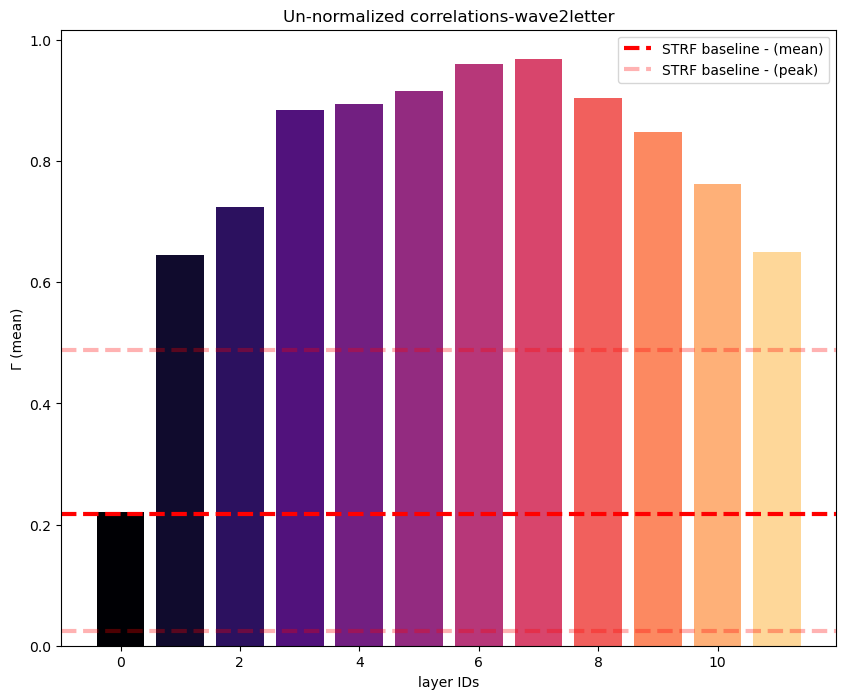

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
column = 'normalized_test_cc'
summary = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

median = summary['50%']
std = summary['std']
max = summary['max']
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(median.shape[0])/median.shape[0])
plt.bar(x=np.arange(median.shape[0]), height=median, color=colors)
# plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### plotting topographical bar plots

In [2]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

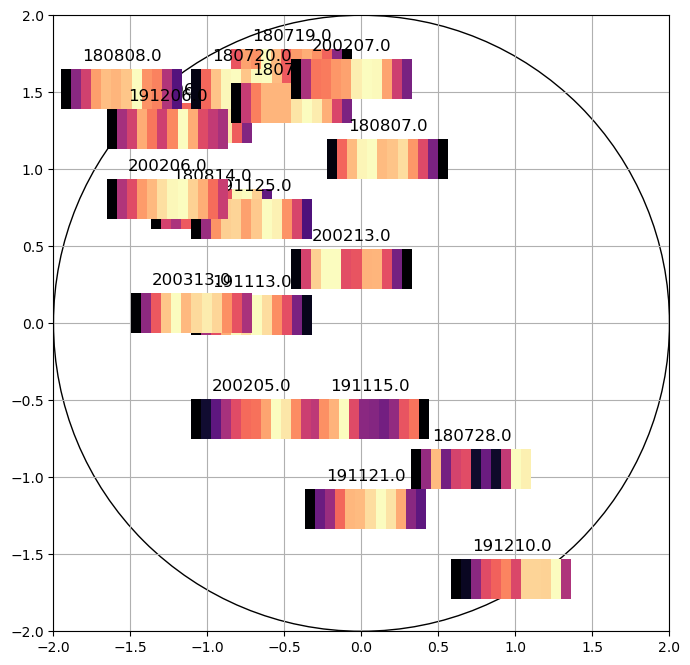

In [3]:
corr_obj.topographic_bar_plots(figsize=8)

### plotting topological peaks

In [3]:
session = 200206
threshold = 0.1
normalized = True
delta_corr = False
bin_width = 20
delay = 0
N_sents = 499

model = 'wave2letter_modified'
# model = 'wave2vec2'
# model = 'speech2text_initial'
# model = 'w2l_original'

corr_obj = analysis.correlations(model)

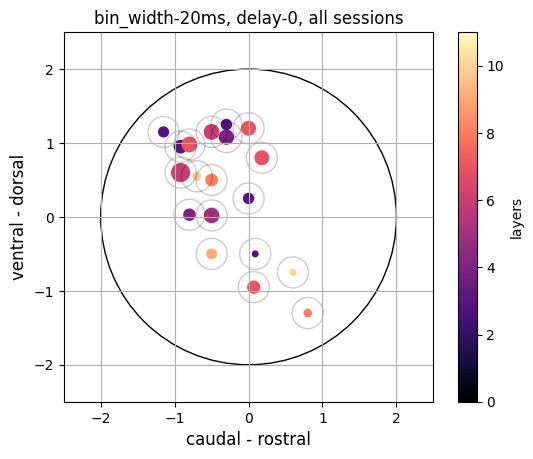

In [8]:
corr_obj.plot_topographical_peaks(
        # unit_circles=False,
        # sessions=c_LH_sessions,
        bin_width=20,
        normalized=False,
        alpha=0.2
        )

fig_name = f"topographical_peaks_all_sessions_20ms.tex"
extra_axis_parameters = {
    'width=\\figwidth',
    'height=\\figheight',
    'every x tick label/.append style={rotate=90}',
    'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
}
tpl_save(
    filepath=os.path.join(results_dir, 'saved_figures', 'topographical', fig_name),
    extra_axis_parameters=extra_axis_parameters,
    tex_relative_path_to_data='pngs',
    extra_lines_start={
        '\\providecommand{\\figwidth}{5.7in}%',
        '\\providecommand{\\figheight}{2.0in}%',
        '\\providecommand{\\thisXticklabelopacity}{1.0}%',
    },
)

#### defining functions

In [95]:
def plot_topographical_peaks(
            sessions = None,
            bin_width = 20,
            delay = 0,
            ax = None,
            threshold = 0.1,
            normalized = False,
            fontsize = 12,
            N_sents = 499
            
        ):


    if ax is None:
        fig, ax = plt.subplots()
    if normalized:
        norm = 'normalized'
        column = 'normalized_test_cc'
    else:
        norm = ''
        column = 'test_cc_raw'


    x_coordinates = []
    y_coordinates = []
    peak_layers = []
    peak_median_corr = []

    scale_size = 500
    if sessions is None:
        sessions = corr_obj.get_all_sessions()
    num_layers = len(corr_obj.get_all_layers('200206'))

    for session in sessions:
        select_data = corr_obj.get_session_data(
            session, threshold=threshold, bin_width=bin_width, delay=delay, N_sents=N_sents
        )
        if not select_data.empty:
            median_across_channels = select_data.groupby('layer', as_index=False).median()
            id = median_across_channels.idxmax()[column]

            # plots 'dot' with size (area) propotional to correlations,
            # and color as function of peak layer
            peak_median_corr.append(median_across_channels.loc[id, column]*scale_size)
            peak_layers.append(median_across_channels.loc[id, 'layer'])
            c_x, c_y = session_to_coordinates[int(session)]
            x_coordinates.append(c_x)
            y_coordinates.append(c_y)

    
    # adding circles of unit area..
    unit_areas = scale_size*np.ones(len(x_coordinates))
    ax.scatter(x_coordinates, y_coordinates, s=unit_areas,
                facecolor='none', edgecolor='black'
            )
    scatt = ax.scatter(
                x_coordinates, y_coordinates, s=peak_median_corr, 
                c=peak_layers, cmap='magma', vmin=0, vmax= num_layers-1, 
            )
    
    # formating plot and adding colorbar
    # adding background circle
    circle = plt.Circle((0,0),2, fill=False)
    ax.set_aspect(1)
    ax.add_artist(circle)
    ax.set_xlim([-2.5,2.5])
    ax.set_ylim([-2.5,2.5])
    ax.set_title(f"bin_width-{bin_width}ms, delay-{delay}", fontsize=fontsize)
    ax.set_xlabel('caudal - rostral', fontsize=fontsize)
    ax.set_ylabel('ventral - dorsal', fontsize=fontsize)
    plt.grid(True)
    plt.colorbar(scatt, ax=ax, label='layers')
            
            

            
        



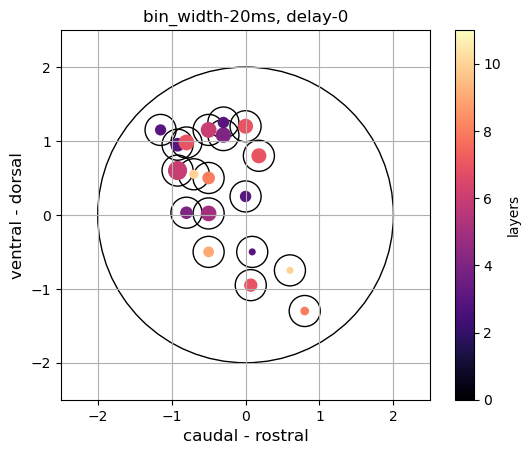

In [96]:
plot_topographical_peaks()

### analyzing whisper

In [1]:
from auditory_cortex.dataloader import DataLoader

dataloader = DataLoader()


INFO:fairseq.tasks.text_to_speech:Please install tensorboardX: pip install tensorboardX
DEBUG:matplotlib.pyplot:Loaded backend agg version unknown.


Reading existing dataframe.


In [3]:
layer_0 = dataloader.get_DNN_layer_features('whisper_small', 0)

Resamping ANN features at bin-width: 20


In [3]:
layer_1 = dataloader.get_DNN_layer_features('whisper_small', 1)

In [4]:
layer_0[12].shape

(69, 768)

In [5]:
layer_1[12].shape

(69, 768)

In [6]:
model = 'whisper_small'
dataloader.get_layer_IDs(model)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): huggingface.co:443
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /openai/whisper-small/resolve/main/preprocessor_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /openai/whisper-small/resolve/main/preprocessor_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /openai/whisper-small/resolve/main/preprocessor_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /openai/whisper-small/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /openai/whisper-small/resolve/main/config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /openai/whisper-small/resolve/main/generation_config.json HTTP/1.1" 200 0


Loaded network from openai/whisper-small


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [6]:
# model = 'whisper_tiny'
# model = 'whisper_base'
# model = 'whisper_small'
# model = 'deepspeech2'
model = 'wave2vec2'
for layer in dataloader.get_layer_IDs(model):
    layer_f = dataloader.get_DNN_layer_features(model, layer)
    print(f"Layer: {layer}, shape: {layer_f[12].shape}")


DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/preprocessor_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
DEBUG:urllib3.connectionpool:https://huggingface.co:443 "HEAD /facebook/wav2vec2-base-960h/resolve/main/config.json HTTP/1.1" 200 0
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Resamping ANN features at bin-width: 20
Layer: 0, shape: (69, 512)
Layer: 1, shape: (69, 512)
Layer: 2, shape: (69, 512)
Layer: 3, shape: (69, 512)
Layer: 4, shape: (69, 512)
Layer: 5, shape: (69, 512)
Layer: 6, shape: (69, 512)
Layer: 7, shape: (69, 768)
Layer: 8, shape: (69, 768)
Layer: 9, shape: (69, 768)
Layer: 10, shape: (69, 768)
Layer: 11, shape: (69, 768)
Layer: 12, shape: (69, 768)
Layer: 13, shape: (69, 768)
Layer: 14, shape: (69, 768)
Layer: 15, shape: (69, 768)
Layer: 16, shape: (69, 768)
Layer: 17, shape: (69, 768)
Layer: 18, shape: (69, 768)
Layer: 19, shape: (69, 768)


In [8]:
model_name = 'whisper'
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


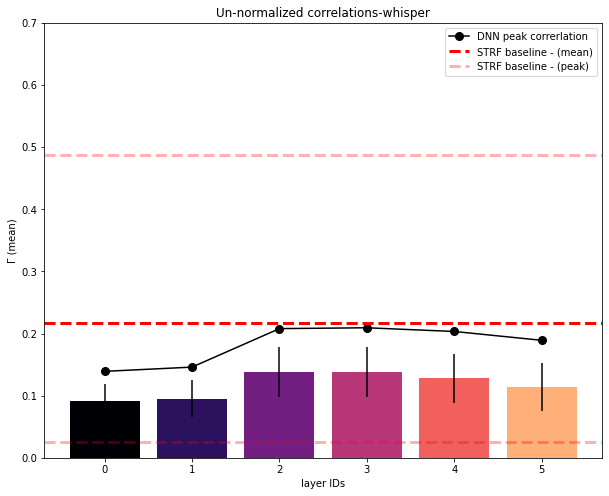

In [9]:
session = 200206
threshold = 0.1
bin_width = 20
delay = 0
N_sents = 499
column = 'test_cc_raw'

fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing wav2vec2

0.10639355370350263


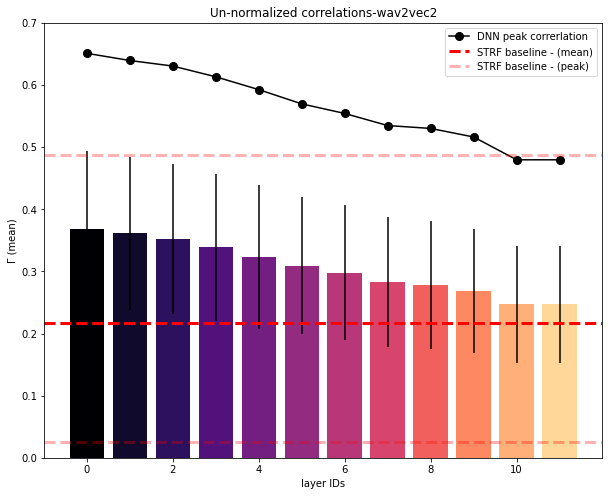

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [4]:
model_name = 'wave2vec2'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\2502881191.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


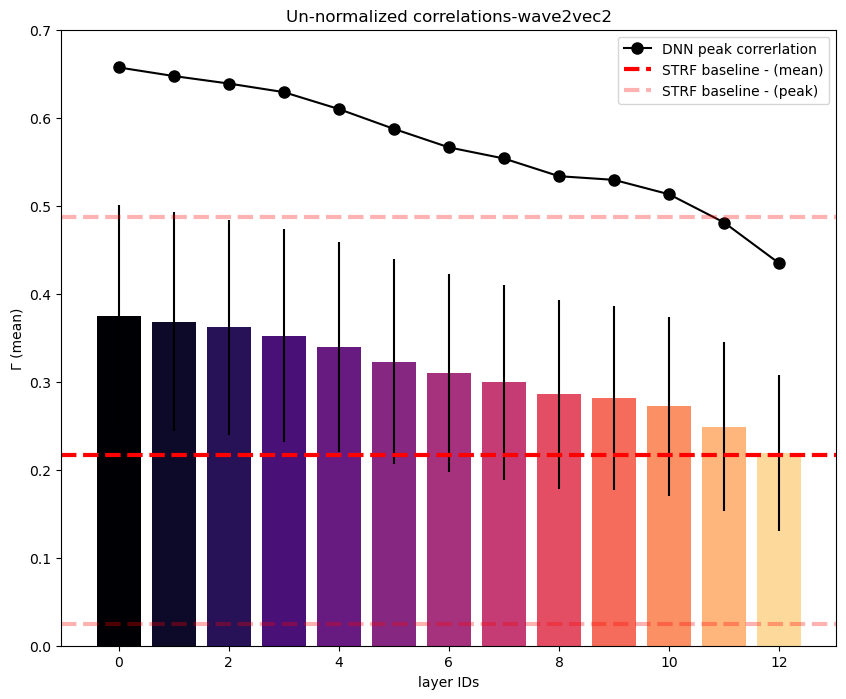

In [36]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_20832\1704734050.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


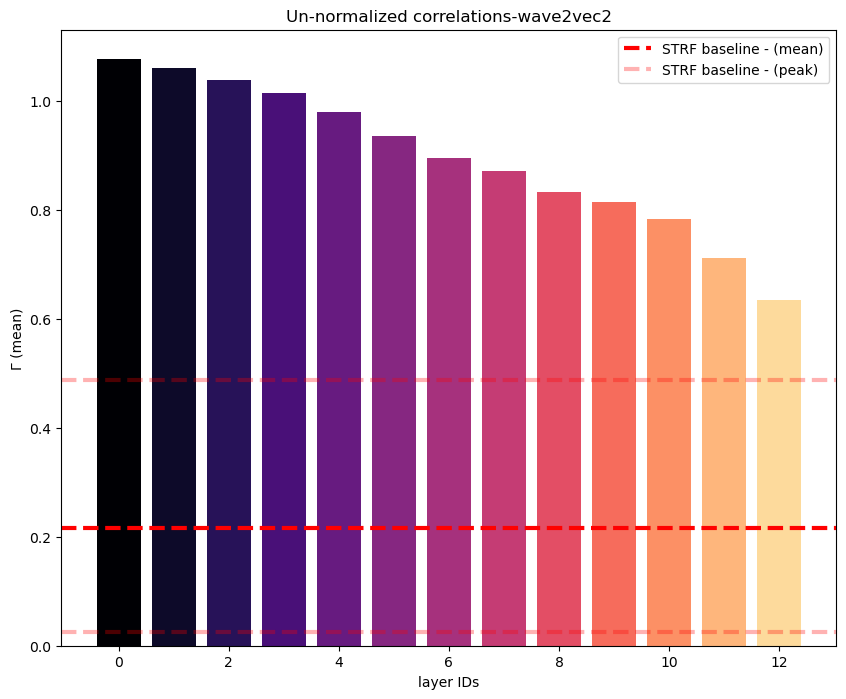

In [22]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
column = 'normalized_test_cc'
summary = corr_obj.summarize(session=session,
                        # threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

median = summary['50%']
std = summary['std']
max = summary['max']
import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(median.shape[0])/median.shape[0])
plt.bar(x=np.arange(median.shape[0]), height=median, color=colors)
# plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [23]:
summary

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
0.0,64.0,1.334930,1.202900,0.784206,0.991270,1.077530,1.287027,10.510459
1.0,64.0,1.311994,1.175576,0.757286,0.971688,1.060556,1.265222,10.268691
2.0,64.0,1.296947,1.218015,0.746088,0.945803,1.039962,1.243199,10.594305
3.0,64.0,1.255734,1.133358,0.719705,0.927444,1.014967,1.210650,9.876241
4.0,64.0,1.207189,1.098812,0.687742,0.898320,0.980043,1.152950,9.574897
5.0,64.0,1.135601,0.974844,0.633431,0.844229,0.935325,1.104702,8.530379
6.0,64.0,1.084282,0.903491,0.616394,0.818278,0.895368,1.059627,7.939400
7.0,64.0,1.059958,0.984054,0.585741,0.773361,0.871288,1.021182,8.577510
8.0,64.0,0.988594,0.797469,0.570030,0.745520,0.832543,0.972099,7.037504


In [39]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]

In [43]:
col_name = 'test_cc_raw'
col_name = 'normalized_test_cc'
select_data.groupby(['layer'])[col_name].describe()
# std = select_data.groupby(['layer'])[col_name].describe()['std']
# mean = select_data.groupby(['layer'])[col_name].describe()['mean']
# max = select_data.groupby(['layer'])[col_name].describe()['max']

,count,mean,std,min,25%,50%,75%,max
layer,,,,,,,,
0.0,63.0,1.189287,0.301404,0.784206,0.990907,1.074152,1.273175,2.092220
1.0,63.0,1.169825,0.299701,0.757286,0.966800,1.059359,1.254591,2.052707
2.0,63.0,1.149370,0.301914,0.746088,0.943526,1.035678,1.239270,2.034925
3.0,63.0,1.118900,0.295964,0.719705,0.924751,1.012948,1.203681,1.964988
4.0,63.0,1.074368,0.282142,0.687742,0.898173,0.979641,1.142666,1.896470
5.0,63.0,1.018224,0.263950,0.633431,0.840484,0.932257,1.101377,1.758371
6.0,63.0,0.975471,0.243897,0.616394,0.814790,0.888757,1.055251,1.678134
7.0,63.0,0.940632,0.240839,0.585741,0.773201,0.868912,1.018715,1.638919
8.0,63.0,0.892580,0.216095,0.570030,0.743297,0.828695,0.968129,1.567510


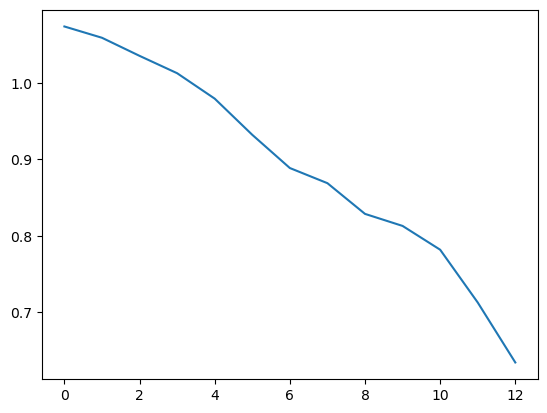

In [45]:
median = select_data.groupby(['layer'])[col_name].describe()['50%']
plt.plot(median)

In [40]:
select_data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,200206.0,0.0,0.0,20.0,0.0,0.268091,0.219214,0.184902,499.0,1.185567
1,200206.0,0.0,1.0,20.0,0.0,0.322614,0.289783,0.225907,499.0,1.282752
2,200206.0,0.0,2.0,20.0,0.0,0.282029,0.237547,0.135402,499.0,1.754383
3,200206.0,0.0,3.0,20.0,0.0,0.450300,0.417725,0.421867,499.0,0.990183
4,200206.0,0.0,4.0,20.0,0.0,0.227496,0.161741,0.124313,499.0,1.301080
...,...,...,...,...,...,...,...,...,...,...
827,200206.0,12.0,59.0,20.0,0.0,0.314074,0.247396,0.503795,499.0,0.491066
828,200206.0,12.0,60.0,20.0,0.0,0.442380,0.402141,0.576695,499.0,0.697319
829,200206.0,12.0,61.0,20.0,0.0,0.335660,0.283510,0.447033,499.0,0.634204
830,200206.0,12.0,62.0,20.0,0.0,0.479446,0.434592,0.551003,499.0,0.788730


### analyzing S2T

In [24]:
model_name = 'speech2text'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
# filename = 'speech2text_testing_for_modified_code.csv'
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\2502881191.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


0.10639355370350263


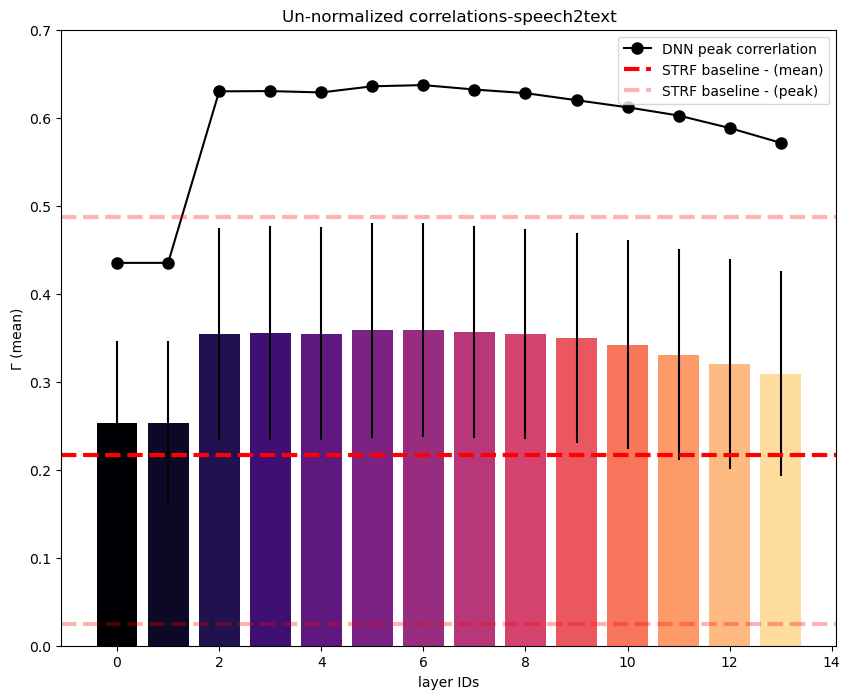

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### analyzing W2L (modified)

In [4]:

filename = 'c_mod_w2l_correlations.csv'
file_path = os.path.join(results_dir, filename)


In [5]:
corr_obj = analysis.correlations(file_path)

In [19]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,200206.0,0.0,0.0,40.0,0.0,0.125167,0.125167,0.252484,500.0,0.495742
1,200206.0,0.0,1.0,40.0,0.0,0.100209,0.100209,0.305889,500.0,0.327600
2,200206.0,0.0,2.0,40.0,0.0,0.054731,0.054731,0.185928,500.0,0.294366
3,200206.0,0.0,3.0,40.0,0.0,0.113907,0.113907,0.553509,500.0,0.205790
4,200206.0,0.0,4.0,40.0,0.0,0.106597,0.106597,0.178577,500.0,0.596926
...,...,...,...,...,...,...,...,...,...,...
6511,200207.0,11.0,57.0,40.0,0.0,0.064903,0.064903,-0.024789,500.0,-2.618180
6512,200207.0,11.0,58.0,40.0,0.0,0.061948,0.061948,-0.019001,500.0,-3.260197
6513,200207.0,11.0,59.0,40.0,0.0,0.242730,0.242730,0.253595,500.0,0.957156
6514,200207.0,11.0,60.0,40.0,0.0,0.112211,0.112211,0.090153,500.0,1.244674


In [21]:
select_data = corr_obj.data[
    (corr_obj.data['session']==float(session)) & \
    (corr_obj.data['bin_width']==bin_width) & \
    (corr_obj.data['delay']==delay) & \
    (corr_obj.data['N_sents']>=N_sents) &\
    (corr_obj.data['normalizer'] >= threshold)     
    ]


In [22]:
select_data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc


In [23]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,200206.0,0.0,0.0,40.0,0.0,0.125167,0.125167,0.252484,500.0,0.495742
1,200206.0,0.0,1.0,40.0,0.0,0.100209,0.100209,0.305889,500.0,0.327600
2,200206.0,0.0,2.0,40.0,0.0,0.054731,0.054731,0.185928,500.0,0.294366
3,200206.0,0.0,3.0,40.0,0.0,0.113907,0.113907,0.553509,500.0,0.205790
4,200206.0,0.0,4.0,40.0,0.0,0.106597,0.106597,0.178577,500.0,0.596926
...,...,...,...,...,...,...,...,...,...,...
6511,200207.0,11.0,57.0,40.0,0.0,0.064903,0.064903,-0.024789,500.0,-2.618180
6512,200207.0,11.0,58.0,40.0,0.0,0.061948,0.061948,-0.019001,500.0,-3.260197
6513,200207.0,11.0,59.0,40.0,0.0,0.242730,0.242730,0.253595,500.0,0.957156
6514,200207.0,11.0,60.0,40.0,0.0,0.112211,0.112211,0.090153,500.0,1.244674


In [ ]:

std = select_data.groupby(['layer'])[col_name].describe()['std']
mean = select_data.groupby(['layer'])[col_name].describe()['mean']
max = select_data.groupby(['layer'])[col_name].describe()['max']
return mean, std, max

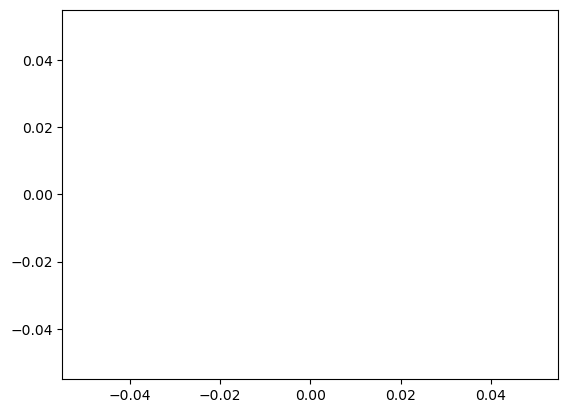

In [17]:
# fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        threshold=0.1,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=499,
                        col_name=column
                        )

cmap = mpl.colormaps.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.plot(mean)
plt.show()
# plt.plot(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.7])
# plt.ylabel('\u0393 (mean)')
# plt.xlabel("layer IDs")
# plt.title("Un-normalized correlations - W2L")
# plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')
# # plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_unnormalized.svg'))
# # saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# # extra_axis_parameters = {
# #     'width=\\figwidth',
# #     'height=\\figheight',
# #     'every x tick label/.append style={rotate=90}',
# #     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# # }
# # tpl_save(
# #     filepath=os.path.join(saved_results, f'correlations_plot_unnormalized.tex'),
# #     extra_axis_parameters=extra_axis_parameters,
# #     tex_relative_path_to_data='pngs',
# #     pre_tikzpicture_lines={
# #         '\\providecommand{\\figwidth}{5.7in}%',
# #         '\\providecommand{\\figheight}{2.0in}%',
# #         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
# #     },
# # )
# # plotting the baseline...
# plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
# print(np.std(baseline_corr))
# plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
# plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
# plt.legend(loc='best')

### w2l original 

In [33]:
model_name = 'w2l_original'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\3937294264.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


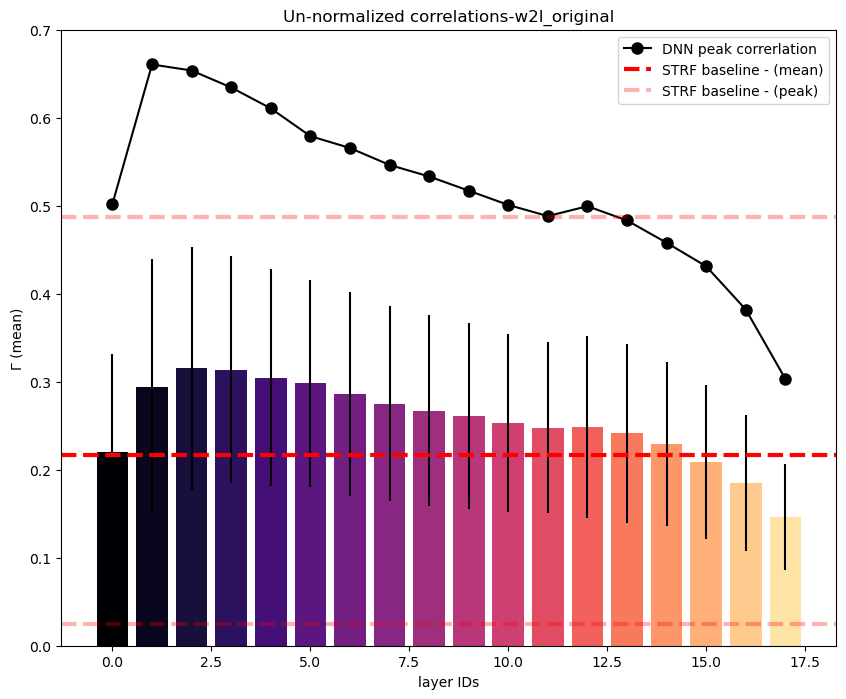

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
plt.ylim([0, 0.7])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

### S2T initial

In [30]:
model_name = 'speech2text_initial'
# results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations'
filename = f"{model_name}_corr_results.csv"
file_path = os.path.join(results_dir, filename)

corr_obj = analysis.correlations(file_path)

0.10639355370350263


C:\Users\ahmedb\AppData\Local\Temp\ipykernel_18632\1737774629.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


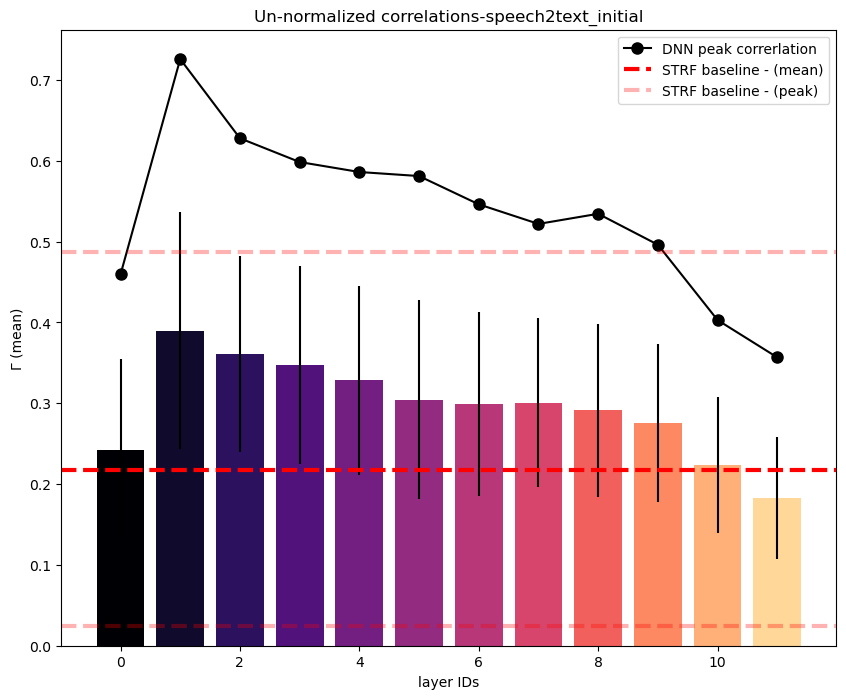

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
# column = 'normalized_test_cc'
column = 'test_cc_raw'
mean, std, max = corr_obj.summarize(session=session,
                        # threshold=threshold,
                        bin_width=40,
                        delay=delay,
                        N_sents=500,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 0.8])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title(f"Un-normalized correlations-{model_name}")

plt.plot(max, 'o-', markersize=8, color='k', label='DNN peak correrlation')

# plotting the baseline...
plt.axhline(np.mean(baseline_corr), c='r', linewidth=3, ls='--', label='STRF baseline - (mean)')
print(np.std(baseline_corr))
plt.axhline(np.max(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3, label='STRF baseline - (peak)')
plt.axhline(np.min(baseline_corr), c='r', linewidth=3, ls='--', alpha=0.3)
plt.legend(loc='best')

In [ ]:
corr_obj = analysis.correlations()

### adding normalizer to S2T

In [2]:
w2l_obj = analysis.correlations()

In [31]:
ch=0

In [59]:
for ch in np.arange(64):
    norm = w2l_obj.data[
        (w2l_obj.data['channel']==ch) &\
        (w2l_obj.data['bin_width']==20) &\
        (w2l_obj.data['delay']==0) &\
        (w2l_obj.data['session']==200206)  
    ]['normalizer'].unique().item()


    indices = corr_obj.data[
        (corr_obj.data['session'] == 200206) &\
        (corr_obj.data['delay'] == 0) &\
        (corr_obj.data['bin_width'] == 40) &\
        (corr_obj.data['channel'] == ch)
                 ].index

    corr_obj.data.iloc[indices,9] = [norm]*len(indices)

In [61]:
corr_obj.data.to_csv(file_path, index=False)

In [33]:
ch = 0
corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ]['normalizer'] =  [w2l_obj.data[
    (w2l_obj.data['channel']==0) &\
    (w2l_obj.data['bin_width']==20) &\
    (w2l_obj.data['delay']==0) &\
    (w2l_obj.data['session']==200206)  
]['normalizer'].unique().item()]*corr_obj.data[
    (corr_obj.data['session'] == 200206) &\
    (corr_obj.data['delay'] == 0) &\
    (corr_obj.data['bin_width'] == 40) &\
    (corr_obj.data['channel'] == ch)
             ].shape[0]

/tmp/ipykernel_17935/3862511374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_obj.data[


In [45]:
indices

Int64Index([0, 64, 128, 192, 256, 320, 384, 448, 512, 576, 640, 704], dtype='int64')

In [52]:
corr_obj.data.iloc[indices,:] 

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,0.18326,500.0,0.117389
64,64,200206.0,1.0,0.0,40.0,0.0,0.321801,0.163754,0.231518,0.18326,500.0,0.163754
128,128,200206.0,2.0,0.0,40.0,0.0,0.279387,0.197370,0.206762,0.18326,500.0,0.197370
192,192,200206.0,3.0,0.0,40.0,0.0,0.267113,0.166666,0.200804,0.18326,500.0,0.166666
256,256,200206.0,4.0,0.0,40.0,0.0,0.250369,0.157234,0.184415,0.18326,500.0,0.157234
320,320,200206.0,5.0,0.0,40.0,0.0,0.227080,0.124205,0.155528,0.18326,500.0,0.124205
384,384,200206.0,6.0,0.0,40.0,0.0,0.225276,0.125305,0.156919,0.18326,500.0,0.125305
448,448,200206.0,7.0,0.0,40.0,0.0,0.239080,0.133947,0.180502,0.18326,500.0,0.133947
512,512,200206.0,8.0,0.0,40.0,0.0,0.203105,0.159919,0.137452,0.18326,500.0,0.159919
576,576,200206.0,9.0,0.0,40.0,0.0,0.204040,0.129886,0.130943,0.18326,500.0,0.129886


In [32]:
select_data

,Unnamed: 0,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents,normalized_test_cc
0,0,200206.0,0.0,0.0,20.0,0.0,0.133938,0.077839,0.104541,1.0,500.0,0.077839
1,1,200206.0,0.0,1.0,20.0,0.0,0.158369,0.130315,0.129954,1.0,500.0,0.130315
2,2,200206.0,0.0,2.0,20.0,0.0,0.091165,0.066794,0.064093,1.0,500.0,0.066794
3,3,200206.0,0.0,3.0,20.0,0.0,0.293687,0.300029,0.269951,1.0,500.0,0.300029
4,4,200206.0,0.0,4.0,20.0,0.0,0.074015,0.044456,0.050008,1.0,500.0,0.044456
...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,200206.0,17.0,59.0,20.0,0.0,0.275006,0.150768,0.161859,1.0,500.0,0.150768
1148,1148,200206.0,17.0,60.0,20.0,0.0,0.363256,0.267382,0.281745,1.0,500.0,0.267382
1149,1149,200206.0,17.0,61.0,20.0,0.0,0.311370,0.190972,0.214294,1.0,500.0,0.190972
1150,1150,200206.0,17.0,62.0,20.0,0.0,0.401034,0.303214,0.325549,1.0,500.0,0.303214


In [34]:
results_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/'
path = os.path.join(results_dir, 'S2T_correlations.csv')


In [35]:
df = pd.read_csv(path)

In [36]:
df

,layer,channel,bin_width,delay,train_cc,val_cc,test_cc
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143
...,...,...,...,...,...,...,...
18427,11.0,59.0,160.0,50.0,0.401246,0.258061,0.253985
18428,11.0,60.0,160.0,50.0,0.513357,0.415336,0.429350
18429,11.0,61.0,160.0,50.0,0.452517,0.337969,0.362935
18430,11.0,62.0,160.0,50.0,0.509439,0.413667,0.446424


In [37]:
df.rename(columns={'train_cc': 'train_cc_raw',
                    'test_cc': 'test_cc_raw'}, inplace=True)

In [38]:
df.head()

,layer,channel,bin_width,delay,train_cc_raw,val_cc,test_cc_raw
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143


In [39]:
df.shape[0]

18432

In [40]:
session = [200206.0]*df.shape[0]

In [14]:
session[0:10]

[200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0,
 200206.0]

In [41]:
len(session)

18432

In [42]:
df['session'] = session

In [43]:
df.head()

,layer,channel,bin_width,delay,train_cc_raw,val_cc,test_cc_raw,session
0,0.0,0.0,40.0,0.0,0.311513,0.144290,0.117389,200206.0
1,0.0,1.0,40.0,0.0,0.285576,0.087960,0.098954,200206.0
2,0.0,2.0,40.0,0.0,0.293831,0.106076,0.109768,200206.0
3,0.0,3.0,40.0,0.0,0.359716,0.206360,0.203166,200206.0
4,0.0,4.0,40.0,0.0,0.290151,0.108559,0.096143,200206.0


In [44]:
df = df.reindex(columns=['session', 'layer', 'channel', 'bin_width', 'delay', 'train_cc_raw', 'test_cc_raw', 'val_cc'])

In [45]:
df.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559


In [46]:
df['normalizer'] = [1.0]*df.shape[0]

In [47]:
df['N_sents'] = [500.0]*df.shape[0]

In [48]:
df.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0


In [49]:
target_dir = '/depot/jgmakin/data/auditory_cortex/correlation_results/cross_validated_correlations/'
name = 'speech2text_initial_corr_results.csv'
path = os.path.join(target_dir, name)

In [52]:
df.to_csv(path)

In [57]:
df

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,val_cc,normalizer,N_sents
0,200206.0,0.0,0.0,40.0,0.0,0.311513,0.117389,0.144290,1.0,500.0
1,200206.0,0.0,1.0,40.0,0.0,0.285576,0.098954,0.087960,1.0,500.0
2,200206.0,0.0,2.0,40.0,0.0,0.293831,0.109768,0.106076,1.0,500.0
3,200206.0,0.0,3.0,40.0,0.0,0.359716,0.203166,0.206360,1.0,500.0
4,200206.0,0.0,4.0,40.0,0.0,0.290151,0.096143,0.108559,1.0,500.0
...,...,...,...,...,...,...,...,...,...,...
18427,200206.0,11.0,59.0,160.0,50.0,0.401246,0.253985,0.258061,1.0,500.0
18428,200206.0,11.0,60.0,160.0,50.0,0.513357,0.429350,0.415336,1.0,500.0
18429,200206.0,11.0,61.0,160.0,50.0,0.452517,0.362935,0.337969,1.0,500.0
18430,200206.0,11.0,62.0,160.0,50.0,0.509439,0.446424,0.413667,1.0,500.0


In [7]:
corr_obj.data

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458
...,...,...,...,...,...,...,...,...,...,...
115135,191121.0,11.0,58.0,20.0,0.0,0.044128,-0.004785,0.005330,500.0,-0.897753
115136,191121.0,11.0,59.0,20.0,0.0,0.184508,0.161731,0.283387,500.0,0.570709
115137,191121.0,11.0,60.0,20.0,0.0,0.037813,0.016685,0.001977,500.0,8.439375
115138,191121.0,11.0,61.0,20.0,0.0,0.037623,-0.000563,-0.007394,500.0,0.076190


### rest of the code...

In [5]:
sessions = corr_obj.get_all_sessions()

In [7]:
for sess in sessions:
    ch = corr_obj.get_all_channels(sess)
    if len(ch) < 60:
        print(f"For {sess}, number of channels:{len(ch)}")

For 180731.0, number of channels:16
For 180720.0, number of channels:16
For 180807.0, number of channels:16
For 180627.0, number of channels:16
For 180717.0, number of channels:16
For 180725.0, number of channels:16
For 180613.0, number of channels:16
For 200318.0, number of channels:45
For 180730.0, number of channels:16
For 180728.0, number of channels:16
For 191212.0, number of channels:57
For 191115.0, number of channels:58
For 180622.0, number of channels:16
For 180502.0, number of channels:16
For 180501.0, number of channels:16
For 180420.0, number of channels:16
For 180413.0, number of channels:16
For 180814.0, number of channels:36
For 180724.0, number of channels:16
For 191209.0, number of channels:59
For 180719.0, number of channels:16
For 180808.0, number of channels:16
For 180810.0, number of channels:16


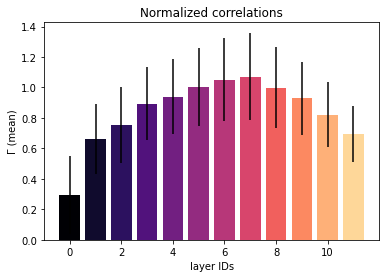

In [14]:
column = 'normalized_test_cc'
mean, std = corr_obj.summarize(session=session,
                        threshold=threshold,
                        bin_width=bin_width,
                        delay=delay,
                        N_sents=N_sents,
                        col_name=column
                        )

import matplotlib.cm as cm
cmap = cm.get_cmap('magma')
colors = cmap(np.arange(mean.shape[0])/mean.shape[0])
plt.bar(x=np.arange(mean.shape[0]), height=mean, yerr=std, color=colors)
# plt.ylim([0, 1.0])
plt.ylabel('\u0393 (mean)')
plt.xlabel("layer IDs")
plt.title("Normalized correlations")
# plt.savefig(os.path.join(saved_results, 'svg_files',f'correlations_plot_normalized.svg'))
# saved_results = '/home/ahmedb/projects/Wav2Letter/saved_results/tikz_files'
# extra_axis_parameters = {
#     'width=\\figwidth',
#     'height=\\figheight',
#     'every x tick label/.append style={rotate=90}',
#     'xticklabel style={opacity=\\thisXticklabelopacity, align=center}',
# }
# tpl_save(
#     filepath=os.path.join(saved_results, f'correlations_plot_normalized.tex'),
#     extra_axis_parameters=extra_axis_parameters,
#     tex_relative_path_to_data='pngs',
#     pre_tikzpicture_lines={
#         '\\providecommand{\\figwidth}{5.7in}%',
#         '\\providecommand{\\figheight}{2.0in}%',
#         '\\providecommand{\\thisXticklabelopacity}{1.0}%',
#     },
# )

In [11]:
corr_obj.data.head()

,session,layer,channel,bin_width,delay,train_cc_raw,test_cc_raw,normalizer,N_sents,normalized_test_cc
0,191113.0,0.0,0.0,40.0,0.0,0.046857,-0.016149,-0.007541,500.0,2.141444
1,191113.0,0.0,1.0,40.0,0.0,0.187930,0.123113,0.093085,500.0,1.322590
2,191113.0,0.0,2.0,40.0,0.0,0.175732,0.124929,0.064035,500.0,1.950964
3,191113.0,0.0,3.0,40.0,0.0,0.087614,0.034642,0.032557,500.0,1.064028
4,191113.0,0.0,4.0,40.0,0.0,0.050437,-0.012446,-0.006368,500.0,1.954458
